In [ ]:
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np

### Import de data

In [ ]:
data = pd.read_csv('dataset_test_2.csv', sep=';',encoding='ISO-8859-1')

In [ ]:
print(data.head())
print(data.shape)

  ref_area.label                                source.label  \
0    Afghanistan  HIES - Households Living Conditions Survey   
1    Afghanistan  HIES - Households Living Conditions Survey   
2    Afghanistan  HIES - Households Living Conditions Survey   
3    Afghanistan  HIES - Households Living Conditions Survey   
4    Afghanistan  HIES - Households Living Conditions Survey   

                                     indicator.label sex.label  \
0  Children in employment by sex, age and school ...     Total   
1  Children in employment by sex, age and school ...     Total   
2  Children in employment by sex, age and school ...     Total   
3  Children in employment by sex, age and school ...     Total   
4  Children in employment by sex, age and school ...     Total   

                    classif1.label  \
0  Age (Child labour bands): '5-17   
1  Age (Child labour bands): '5-17   
2  Age (Child labour bands): '5-17   
3  Age (Child labour bands): '5-17   
4  Age (Child labour bands):

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        8745 non-null   object 
 1   source.label          8745 non-null   object 
 2   indicator.label       8745 non-null   object 
 3   sex.label             8745 non-null   object 
 4   classif1.label        8745 non-null   object 
 5   classif2.label        8745 non-null   object 
 6   time                  8745 non-null   int64  
 7   obs_value             8153 non-null   float64
 8   obs_status.label      1894 non-null   object 
 9   note_indicator.label  749 non-null    object 
 10  note_source.label     7665 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 751.7+ KB
None


# Nettoyage de donnees

In [ ]:
df = data[['ref_area.label', 'sex.label', 'classif1.label','classif2.label', 'time', 'obs_value','obs_status.label']]

# Renommer pour plus de clarté
df.columns = ['Country', 'Sex', 'Age_group','Education_Status', 'Year', 'Value','Fiability_data']

# Supprimer les lignes avec valeur manquante
df_clean = df.dropna(subset=['Value']).copy()

# Transformer l'année en format datetime
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')

# Supprimer les doublons si existants
df_clean = df_clean.drop_duplicates()


df_clean['Age_group'] = df_clean['Age_group'].str.replace(
    "Age \(Child labour bands\): '?",  # '? signifie "0 ou 1 apostrophe"
    "",
    regex=True
)

df_clean['Education_Status'] = df_clean['Education_Status'].str.replace(
    "Educational attendance: ",  # Texte à supprimer
    "",                          # Remplacer par une chaîne vide
    regex=True                 # Désactiver les regex pour un remplacement littéral
)


# Afficher un aperçu
print("\nDonnées nettoyées :")
print(df_clean.head())

# Sauvegarder le résultat
df_clean.to_csv('cleaned_data.csv', index=False)

print("\nFichier nettoyé enregistré sous 'cleaned_child_labour_data.csv'.")


Données nettoyées :
       Country    Sex Age_group          Education_Status       Year  \
0  Afghanistan  Total      5-17                     Total 2014-01-01   
1  Afghanistan  Total      5-17                 Attending 2014-01-01   
2  Afghanistan  Total      5-17             Not attending 2014-01-01   
3  Afghanistan  Total      5-17  Not elsewhere classified 2014-01-01   
4  Afghanistan  Total      5-11                     Total 2014-01-01   

      Value Fiability_data  
0  3261.161            NaN  
1  1556.560            NaN  
2   185.107            NaN  
3  1519.494            NaN  
4  1254.495            NaN  

Fichier nettoyé enregistré sous 'cleaned_child_labour_data.csv'.


In [ ]:
child=pd.read_csv(r'cleaned_data.csv')
print(child.head())
print(child.shape)

       Country    Sex Age_group          Education_Status        Year  \
0  Afghanistan  Total      5-17                     Total  2014-01-01   
1  Afghanistan  Total      5-17                 Attending  2014-01-01   
2  Afghanistan  Total      5-17             Not attending  2014-01-01   
3  Afghanistan  Total      5-17  Not elsewhere classified  2014-01-01   
4  Afghanistan  Total      5-11                     Total  2014-01-01   

      Value Fiability_data  
0  3261.161            NaN  
1  1556.560            NaN  
2   185.107            NaN  
3  1519.494            NaN  
4  1254.495            NaN  
(8153, 7)


In [ ]:
# Filtrer sur Age_group, Sex et Education_Status = "Total"
df_filtered = child[
    (child['Age_group'] == '5-17') &
    (child['Sex'] == 'Total') &
    (child['Education_Status'] == 'Total')
]

# Trier par Value décroissant et afficher les 10 premiers résultats
top_n = 20
top = df_filtered[['Country', 'Year', 'Age_group', 'Sex', 'Education_Status', 'Value']].sort_values(by='Value', ascending=False).head(top_n)

print("Top valeurs pour Age_group=Total, Sex=Total, Education_Status=Total :")
print(top)


Top valeurs pour Age_group=Total, Sex=Total, Education_Status=Total :
                                 Country        Year Age_group    Sex  \
6729                               World  2020-01-01      5-17  Total   
6765                              Africa  2020-01-01      5-17  Total   
6837                  Sub-Saharan Africa  2020-01-01      5-17  Total   
7269                Asia and the Pacific  2020-01-01      5-17  Total   
6909                      Eastern Africa  2020-01-01      5-17  Total   
6981                      Western Africa  2020-01-01      5-17  Total   
7449                       Southern Asia  2020-01-01      5-17  Total   
7341  South-Eastern Asia and the Pacific  2020-01-01      5-17  Total   
7377                  South-Eastern Asia  2020-01-01      5-17  Total   
2440                            Ethiopia  2015-01-01      5-17  Total   
6873                      Central Africa  2020-01-01      5-17  Total   
7017                            Americas  2020-01-01  

In [ ]:
import pandas as pd

# Charger le fichier d'origine
df = pd.read_csv("cleaned_data.csv")

# Multiplier la colonne 'value' par 1000 et créer une nouvelle colonne
df['Value'] = df['Value'] * 1000

# Sauvegarder le DataFrame dans un nouveau fichier CSV
df.to_csv("cleaned_data_multiplied.csv", index=False)

print("Nouveau fichier 'cleaned_data_multiplied.csv' créé avec la colonne 'value_multiplied'.")


Nouveau fichier 'cleaned_data_multiplied.csv' créé avec la colonne 'value_multiplied'.


Nombre d'entrées après filtrage : 128
Années disponibles : ['2014-01-01' '2020-01-01' '2017-01-01' '2018-01-01' '2022-01-01'
 '2010-01-01' '2019-01-01' '2016-01-01' '2015-01-01' '2013-01-01'
 '2012-01-01' '2023-01-01' '2021-01-01' '2024-01-01' '2011-01-01']


<ipython-input-11-e2d0a7c4296e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = pd.to_datetime(df_filtered['Year']).dt.year


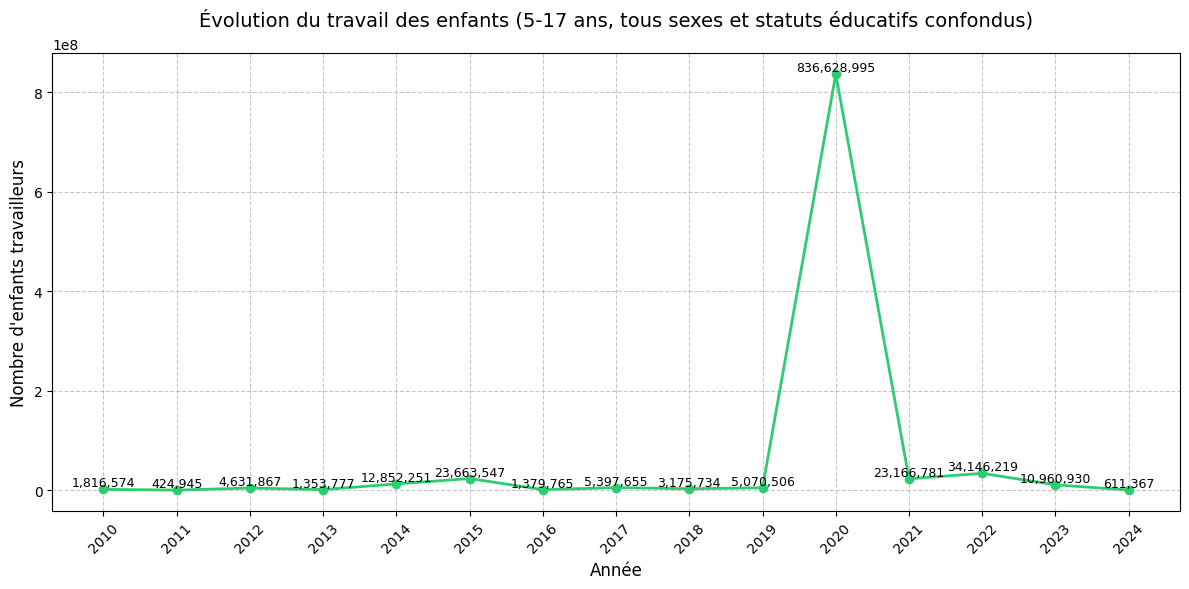

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier nettoyé
df = pd.read_csv("cleaned_data_multiplied.csv")

# Appliquer les filtres
condition = (
    (df['Age_group'] == '5-17') &
    (df['Sex'] == 'Total') &
    (df['Education_Status'] == 'Total')
)
df_filtered = df[condition]

# Vérification des données filtrées
print("Nombre d'entrées après filtrage :", len(df_filtered))
print("Années disponibles :", df_filtered['Year'].unique())

# Conversion de l'année et agrégation
df_filtered['Year'] = pd.to_datetime(df_filtered['Year']).dt.year
df_grouped = df_filtered.groupby('Year', as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'],
         df_grouped['Value'],
         marker='o',
         linestyle='-',
         color='#2ecc71',
         linewidth=2)

plt.title("Évolution du travail des enfants (5-17 ans, tous sexes et statuts éducatifs confondus)",
          fontsize=14,
          pad=20)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'enfants travailleurs", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_grouped['Year'], rotation=45)
plt.tight_layout()

# Ajouter les valeurs sur les points
for x, y in zip(df_grouped['Year'], df_grouped['Value']):
    plt.text(x, y, f'{int(y):,}',
             ha='center',
             va='bottom',
             fontsize=9)

plt.show()


In [ ]:
import pandas as pd

# Liste des régions à exclure
regions = [
    'World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
    'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
    'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
    'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
    'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
    'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
    'Western Asia'
]

# Charger le fichier
df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtrer pour ne garder que les pays (pas les régions) et les totaux pertinents
df_pays = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# Trier par Value décroissant
top_n = 10
top_countries = df_pays[['Country', 'Year', 'Value']].sort_values(by='Value', ascending=False).head(top_n)

print("Pays et années avec les plus grandes valeurs de travail des enfants :")
print(top_countries)


Pays et années avec les plus grandes valeurs de travail des enfants :
                               Country        Year       Value
2440                          Ethiopia  2015-01-01  19044691.0
2404                          Ethiopia  2021-01-01   9603262.0
4694                           Nigeria  2022-01-01   9015391.0
3278                             India  2023-01-01   6904617.0
1082  Democratic Republic of the congo  2020-01-01   6373050.0
6280                            Uganda  2021-01-01   5491148.0
6196       United Republic of Tanzania  2020-01-01   5128527.0
3309                             India  2022-01-01   5123563.0
6244       United Republic of Tanzania  2014-01-01   5066889.0
3340                             India  2021-01-01   4642897.0


In [ ]:
import pandas as pd

# Charger le fichier
df = pd.read_csv("cleaned_data_multiplied.csv")

# Afficher toutes les valeurs uniques de la colonne 'Country'
print(df['Country'].unique())


['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Austria' 'Burundi' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Belarus' 'Belize' 'Bolivia (Plurinational State of)' 'Brazil'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Switzerland' 'Chile'
 "Côte d'Ivoire" 'Democratic Republic of the congo' 'Cook Islands'
 'Colombia' 'Comoros' 'Costa Rica' 'Czechia' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'France' 'Gabon'
 'United Kingdom of Great Britain and Northern Ireland' 'Georgia' 'Ghana'
 'Gambia' 'Guinea-Bissau' 'Greece' 'Guatemala' 'Honduras' 'Haiti'
 'Hungary' 'Indonesia' 'India' 'Iran (Islamic Republic of)' 'Iraq' 'Italy'
 'Jamaica' 'Jordan' 'Kenya' 'Cambodia' "Lao People's Democratic Republic"
 'Lebanon' 'Liberia' 'Sri Lanka' 'Republic of Moldova' 'Madagascar'
 'Maldives' 'Mexico' 'Marshall Islands' 'Mali' 'Myanmar' 'Mongolia'
 'Mauritania' 'Mauritius' 'Malawi' 'Niger' 'Nigeria' 'Niue' 'Pakistan'
 'Panama' 'Peru' 'Philippines' 'Palau' 'Poland' 'Po

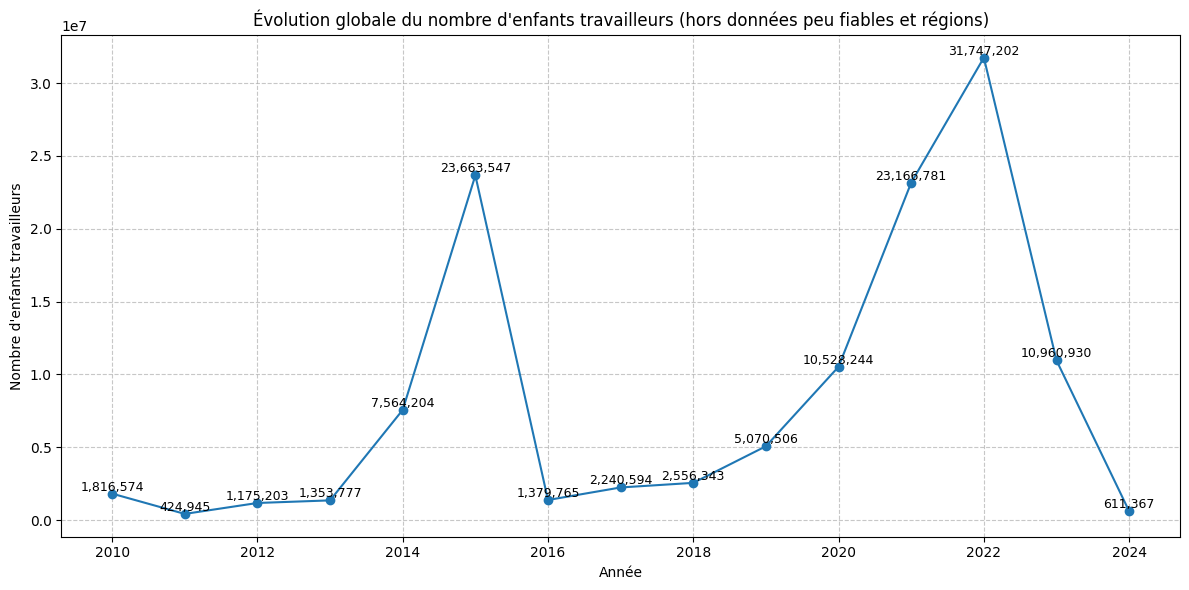

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste des régions à exclure
regions = [
    'World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
    'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
    'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
    'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
    'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
    'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
    'Western Asia'
]

# Charger le fichier
df = pd.read_csv("cleaned_data_multiplied.csv")

# Exclure les lignes peu fiables
df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]

# Exclure les régions et ne garder que les totaux pertinents
df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# S'assurer que Year est bien au format année
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Grouper par année et sommer les Value
df_yearly = df.groupby('Year', as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(df_yearly['Year'], df_yearly['Value'], marker='o')
plt.title("Évolution globale du nombre d'enfants travailleurs (hors données peu fiables et régions)")
plt.xlabel("Année")
plt.ylabel("Nombre d'enfants travailleurs")
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher la valeur sur chaque point
for x, y in zip(df_yearly['Year'], df_yearly['Value']):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


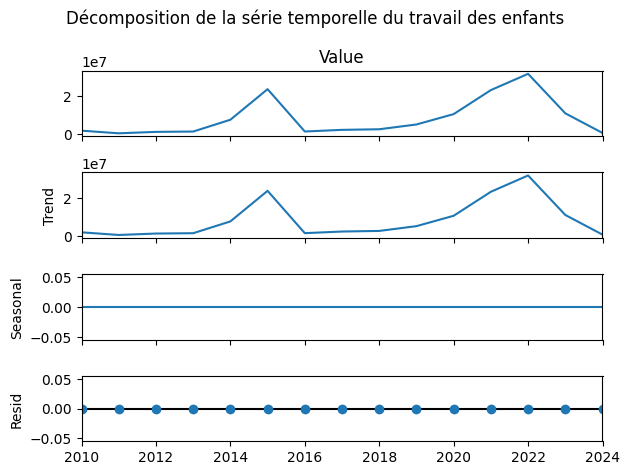

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Charger le fichier CSV
df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtrer pour exclure les données peu fiables et les régions
regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
           'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean',
           'Caribbean', 'Central America', 'South America', 'Northern America', 'Arab States',
           'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific',
           'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
           'Northern Southern and Western Europe', 'Northern Europe', 'Southern Europe',
           'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia', 'Western Asia']

df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]
df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# Convertir en format datetime et extraire l'année
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Agréger par année
df_yearly = df.groupby('Year')['Value'].sum().reset_index()
df_yearly = df_yearly.set_index('Year')

# Effectuer la décomposition
decomposition = seasonal_decompose(df_yearly['Value'], model='additive', period=1)

# Visualiser les résultats
fig = decomposition.plot()
plt.suptitle("Décomposition de la série temporelle du travail des enfants")
plt.tight_layout()
plt.show()


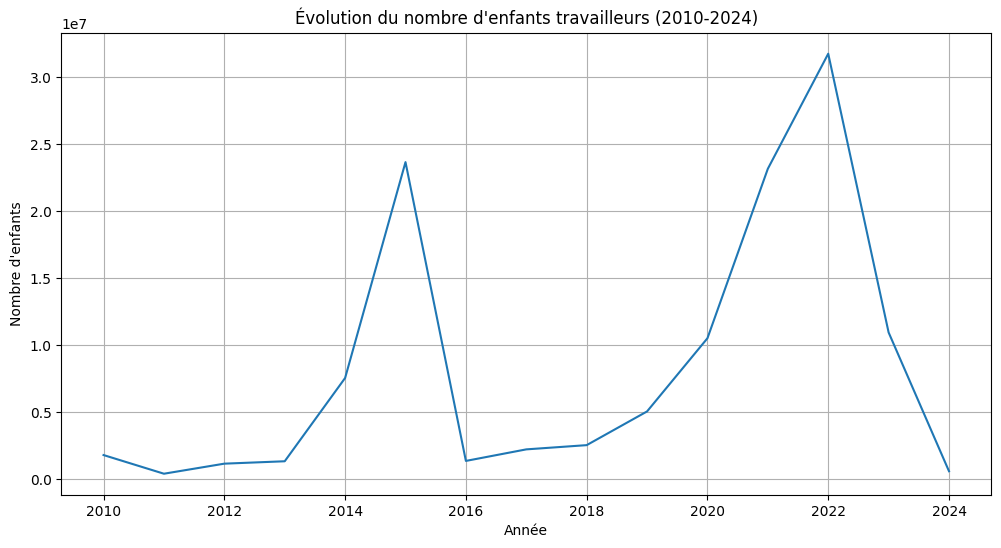

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Chargement des données
df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtrer les régions et les données non fiables
regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
           'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
           'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
           'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
           'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
           'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
           'Western Asia']

df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]
df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]

# Préparer les données temporelles
df['Year'] = pd.to_datetime(df['Year']).dt.year
df_yearly = df.groupby('Year')['Value'].sum().reset_index()
df_yearly = df_yearly.set_index('Year')

# Visualiser la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'])
plt.title('Évolution du nombre d\'enfants travailleurs (2010-2024)')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.grid(True)
plt.show()


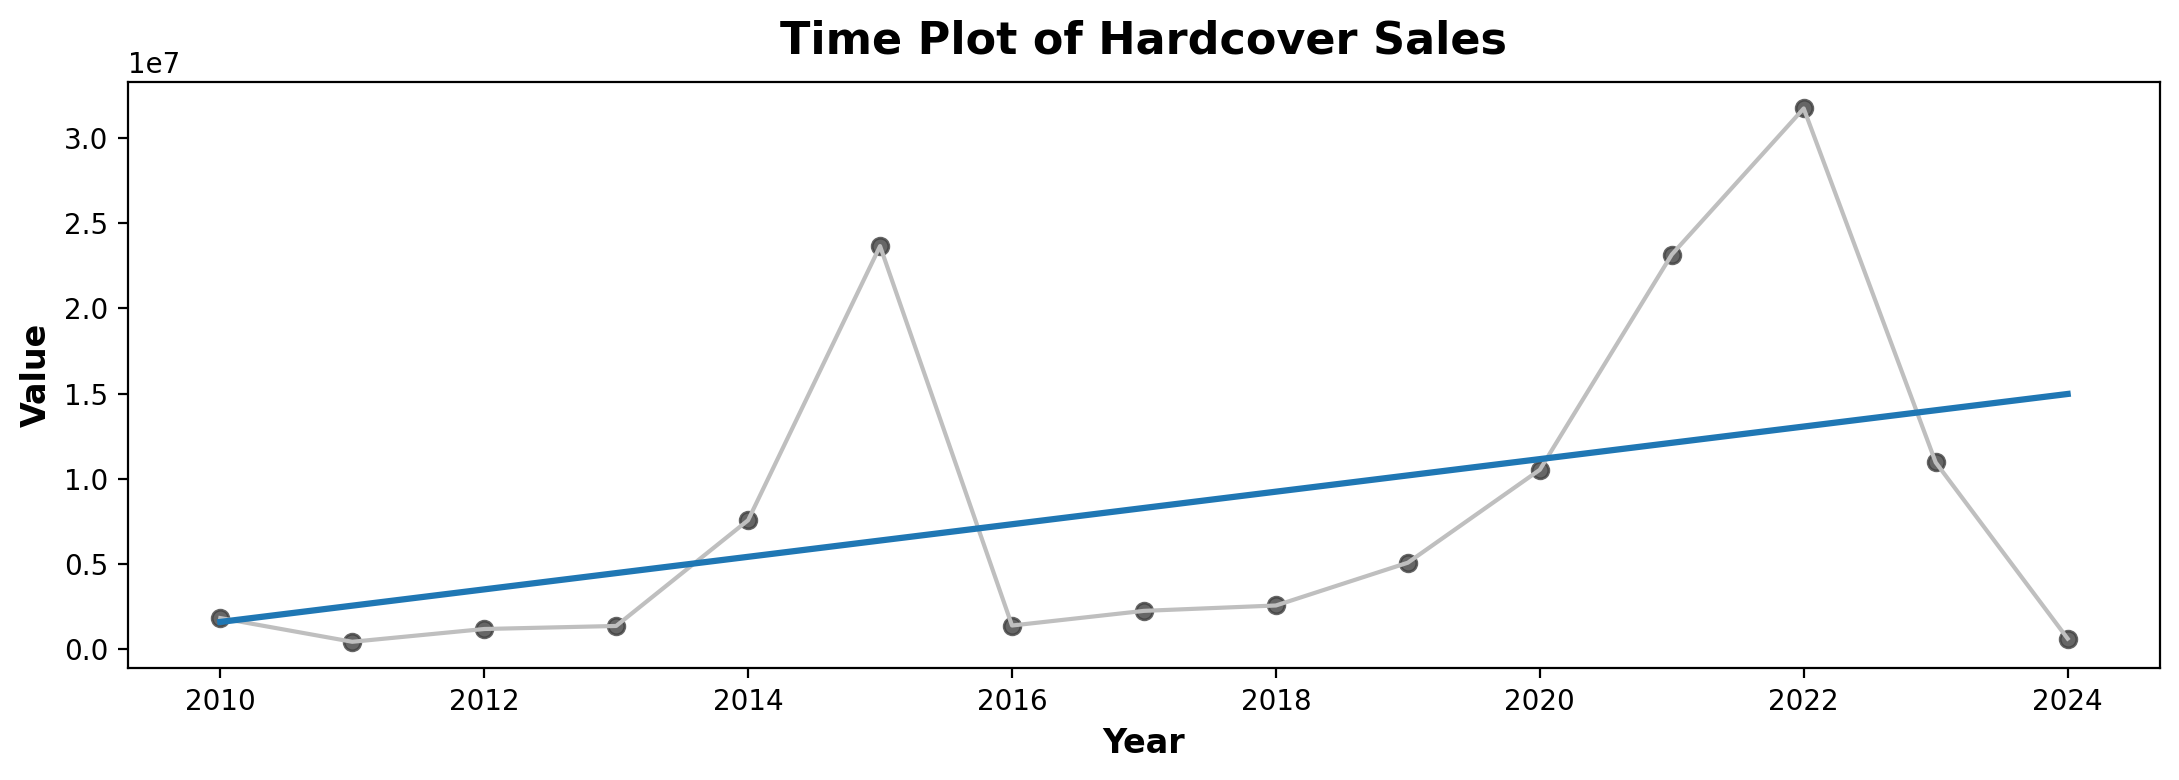

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot(df_yearly.index, df_yearly['Value'], data=df_yearly, color='0.75')
ax = sns.regplot(x=df_yearly.index, y=df_yearly['Value'], data=df_yearly, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

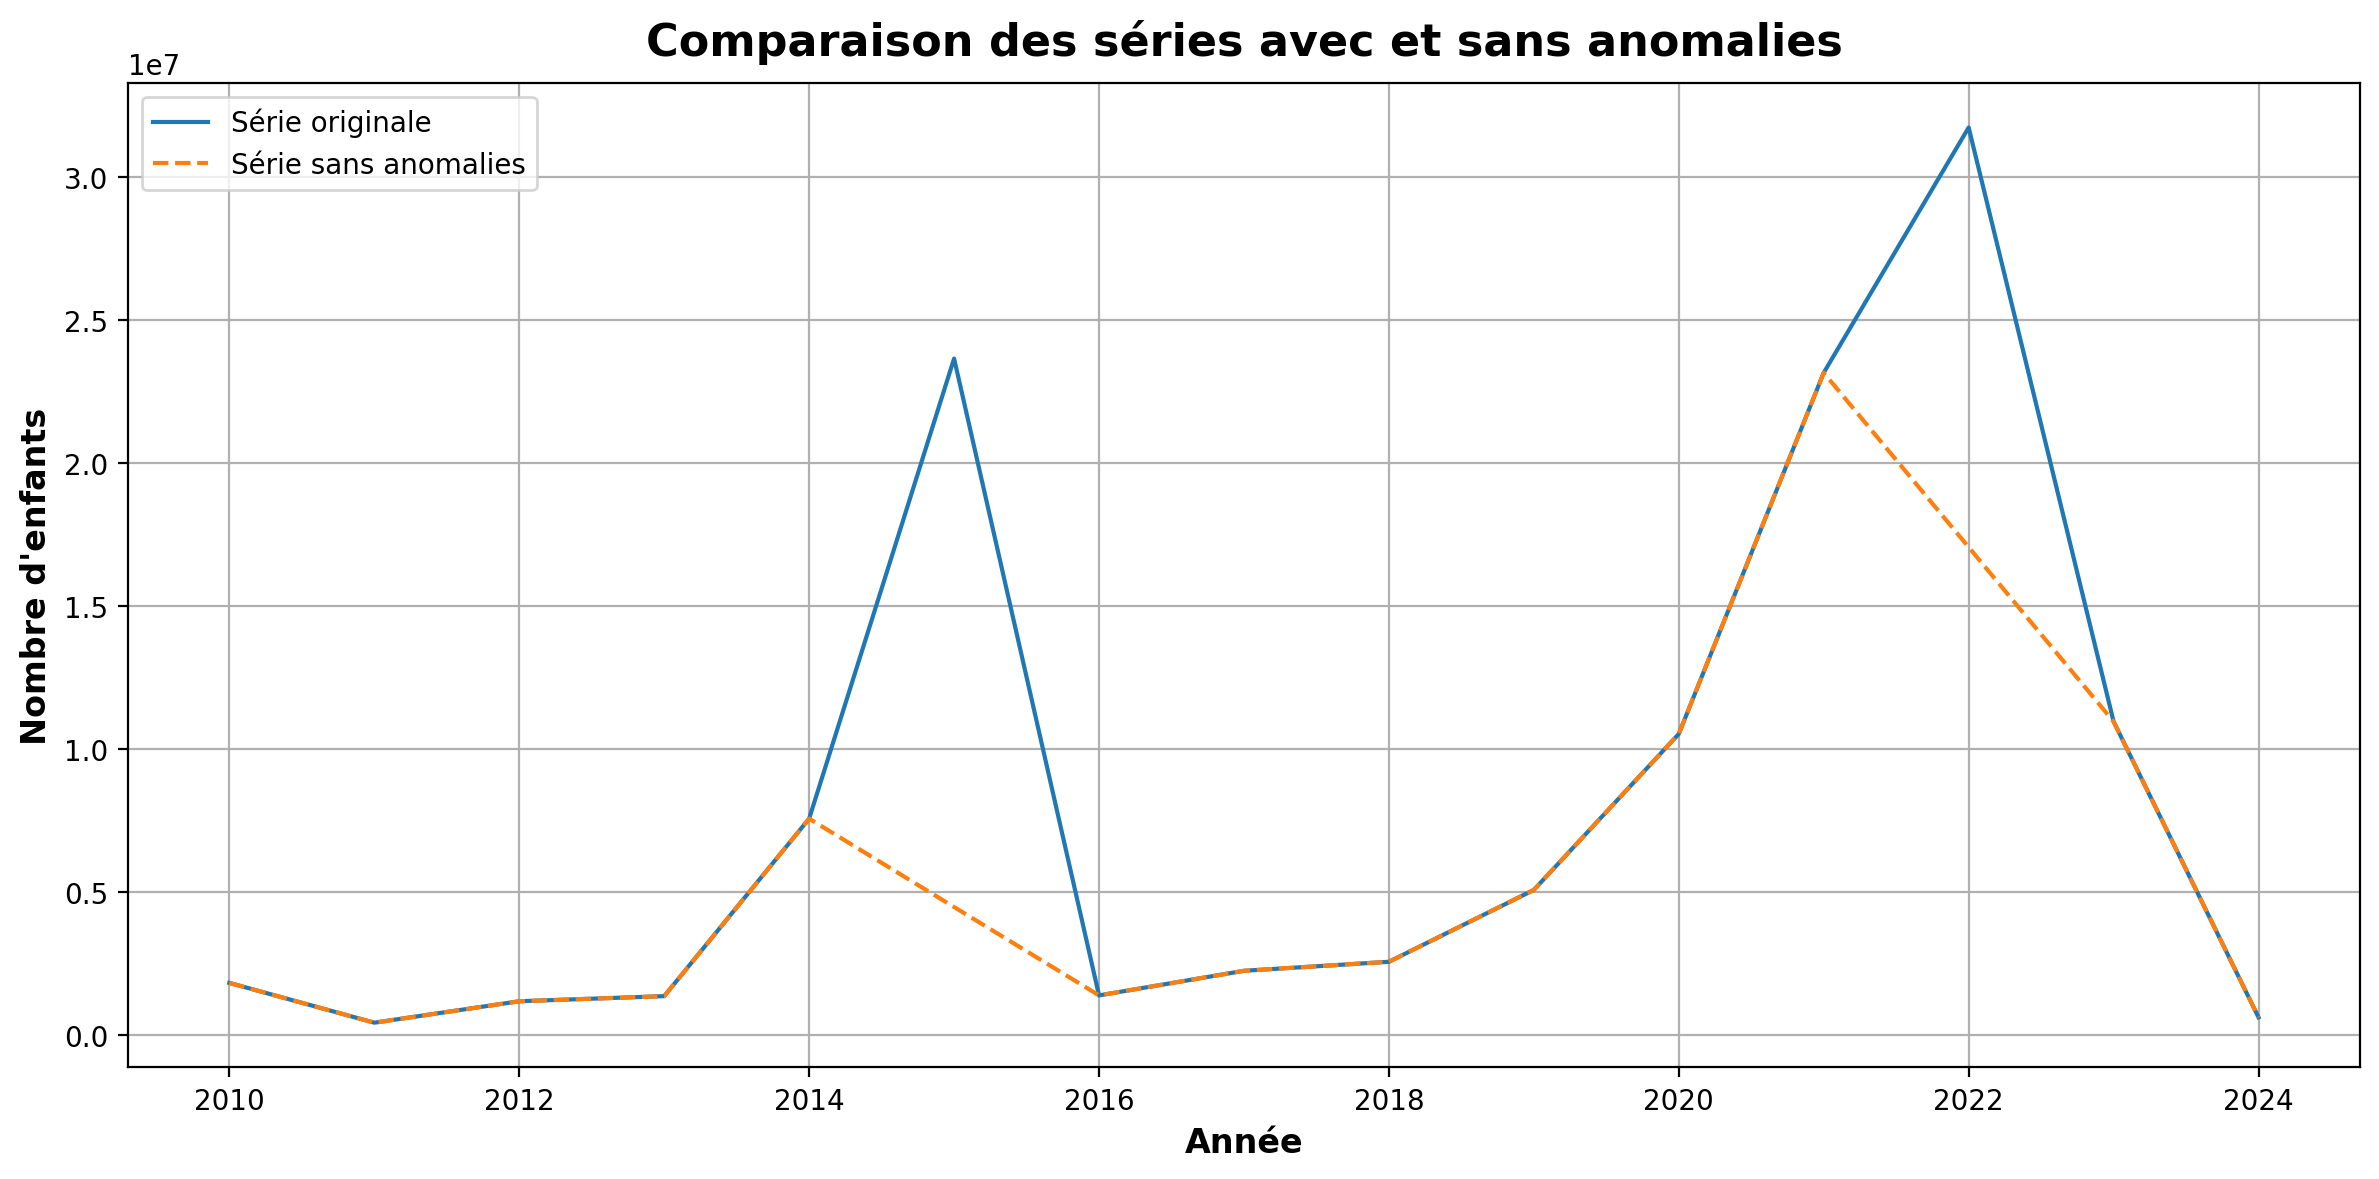

In [ ]:
# Créer une version sans anomalies pour comparaison
df_no_anomalies = df_yearly.copy()
anomaly_years = [2015, 2022]  # Années à traiter comme anomalies

# Méthode 1: Remplacer par la moyenne des années adjacentes
for year in anomaly_years:
    if year in df_no_anomalies.index:
        prev_year = year - 1
        next_year = year + 1
        if prev_year in df_no_anomalies.index and next_year in df_no_anomalies.index:
            df_no_anomalies.loc[year, 'Value'] = (df_no_anomalies.loc[prev_year, 'Value'] +
                                                 df_no_anomalies.loc[next_year, 'Value']) / 2

# Visualiser la série avec et sans anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'], label='Série originale')
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Série sans anomalies', linestyle='--')
plt.title('Comparaison des séries avec et sans anomalies')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


Statistique ADF : -2.3020
p-value : 0.1713
Valeurs critiques :
	1%: -4.0689
	5%: -3.1271
	10%: -2.7017
La série n'est pas stationnaire (non-rejet de l'hypothèse nulle)


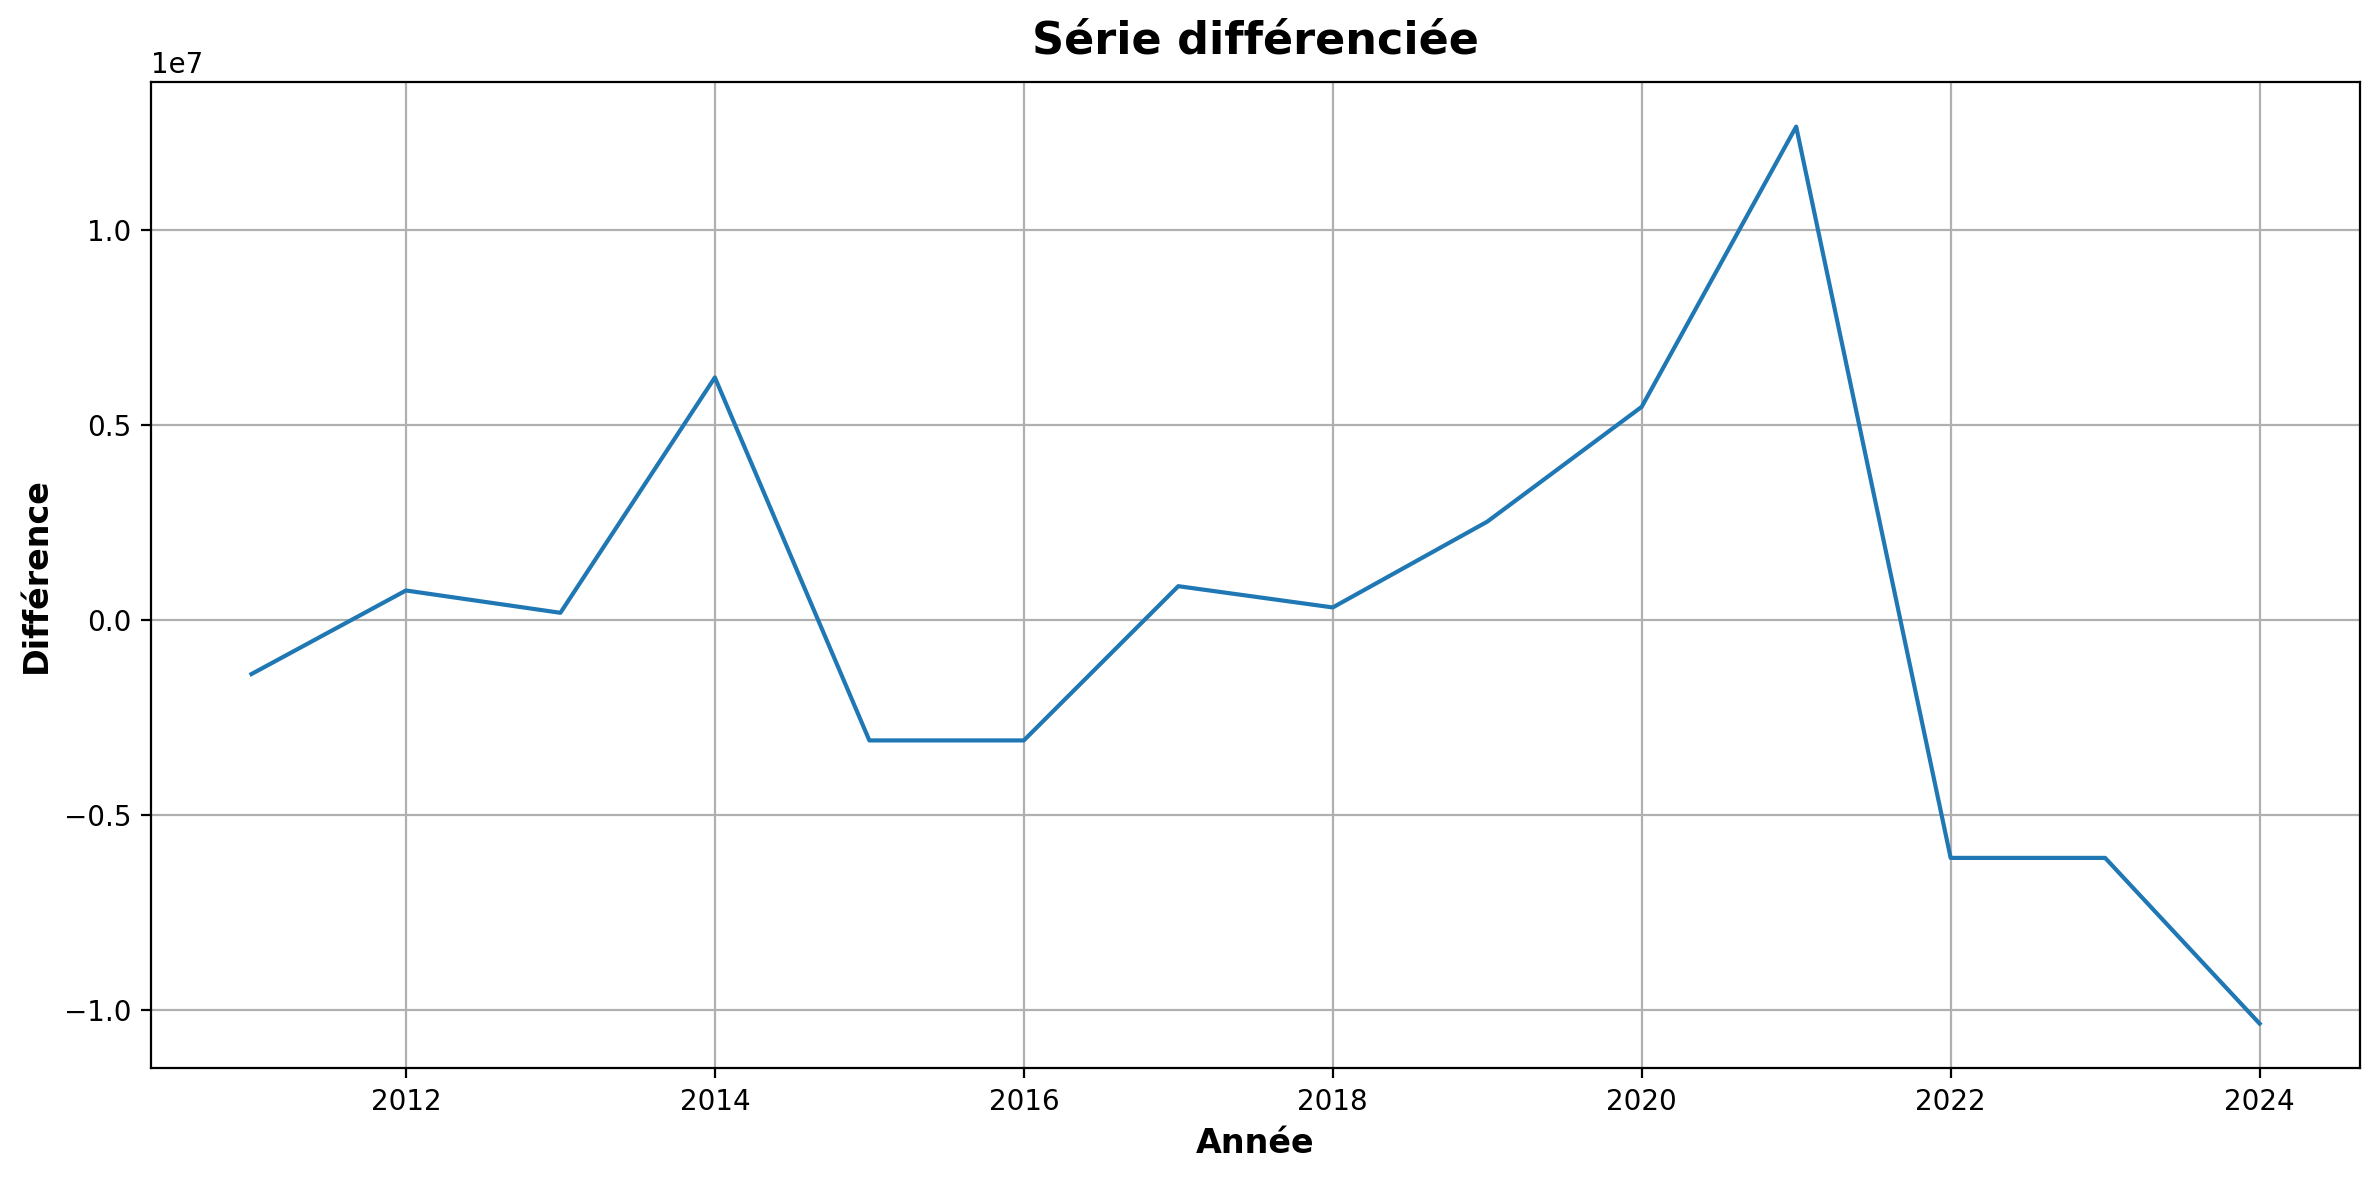

Statistique ADF : -3.5959
p-value : 0.0058
Valeurs critiques :
	1%: -4.6652
	5%: -3.3672
	10%: -2.8030
La série est stationnaire (rejet de l'hypothèse nulle)


In [ ]:
# Test de Dickey-Fuller augmenté
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('Statistique ADF : {:.4f}'.format(result[0]))
    print('p-value : {:.4f}'.format(result[1]))
    print('Valeurs critiques :')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))

    # Interprétation
    if result[1] <= 0.05:
        print("La série est stationnaire (rejet de l'hypothèse nulle)")
    else:
        print("La série n'est pas stationnaire (non-rejet de l'hypothèse nulle)")

# Test sur la série sans anomalies
test_stationarity(df_no_anomalies['Value'])

# Différenciation si nécessaire
df_diff = df_no_anomalies.diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['Value'])
plt.title('Série différenciée')
plt.ylabel('Différence')
plt.xlabel('Année')
plt.grid(True)
plt.show()

# Test de stationnarité sur la série différenciée
test_stationarity(df_diff['Value'])


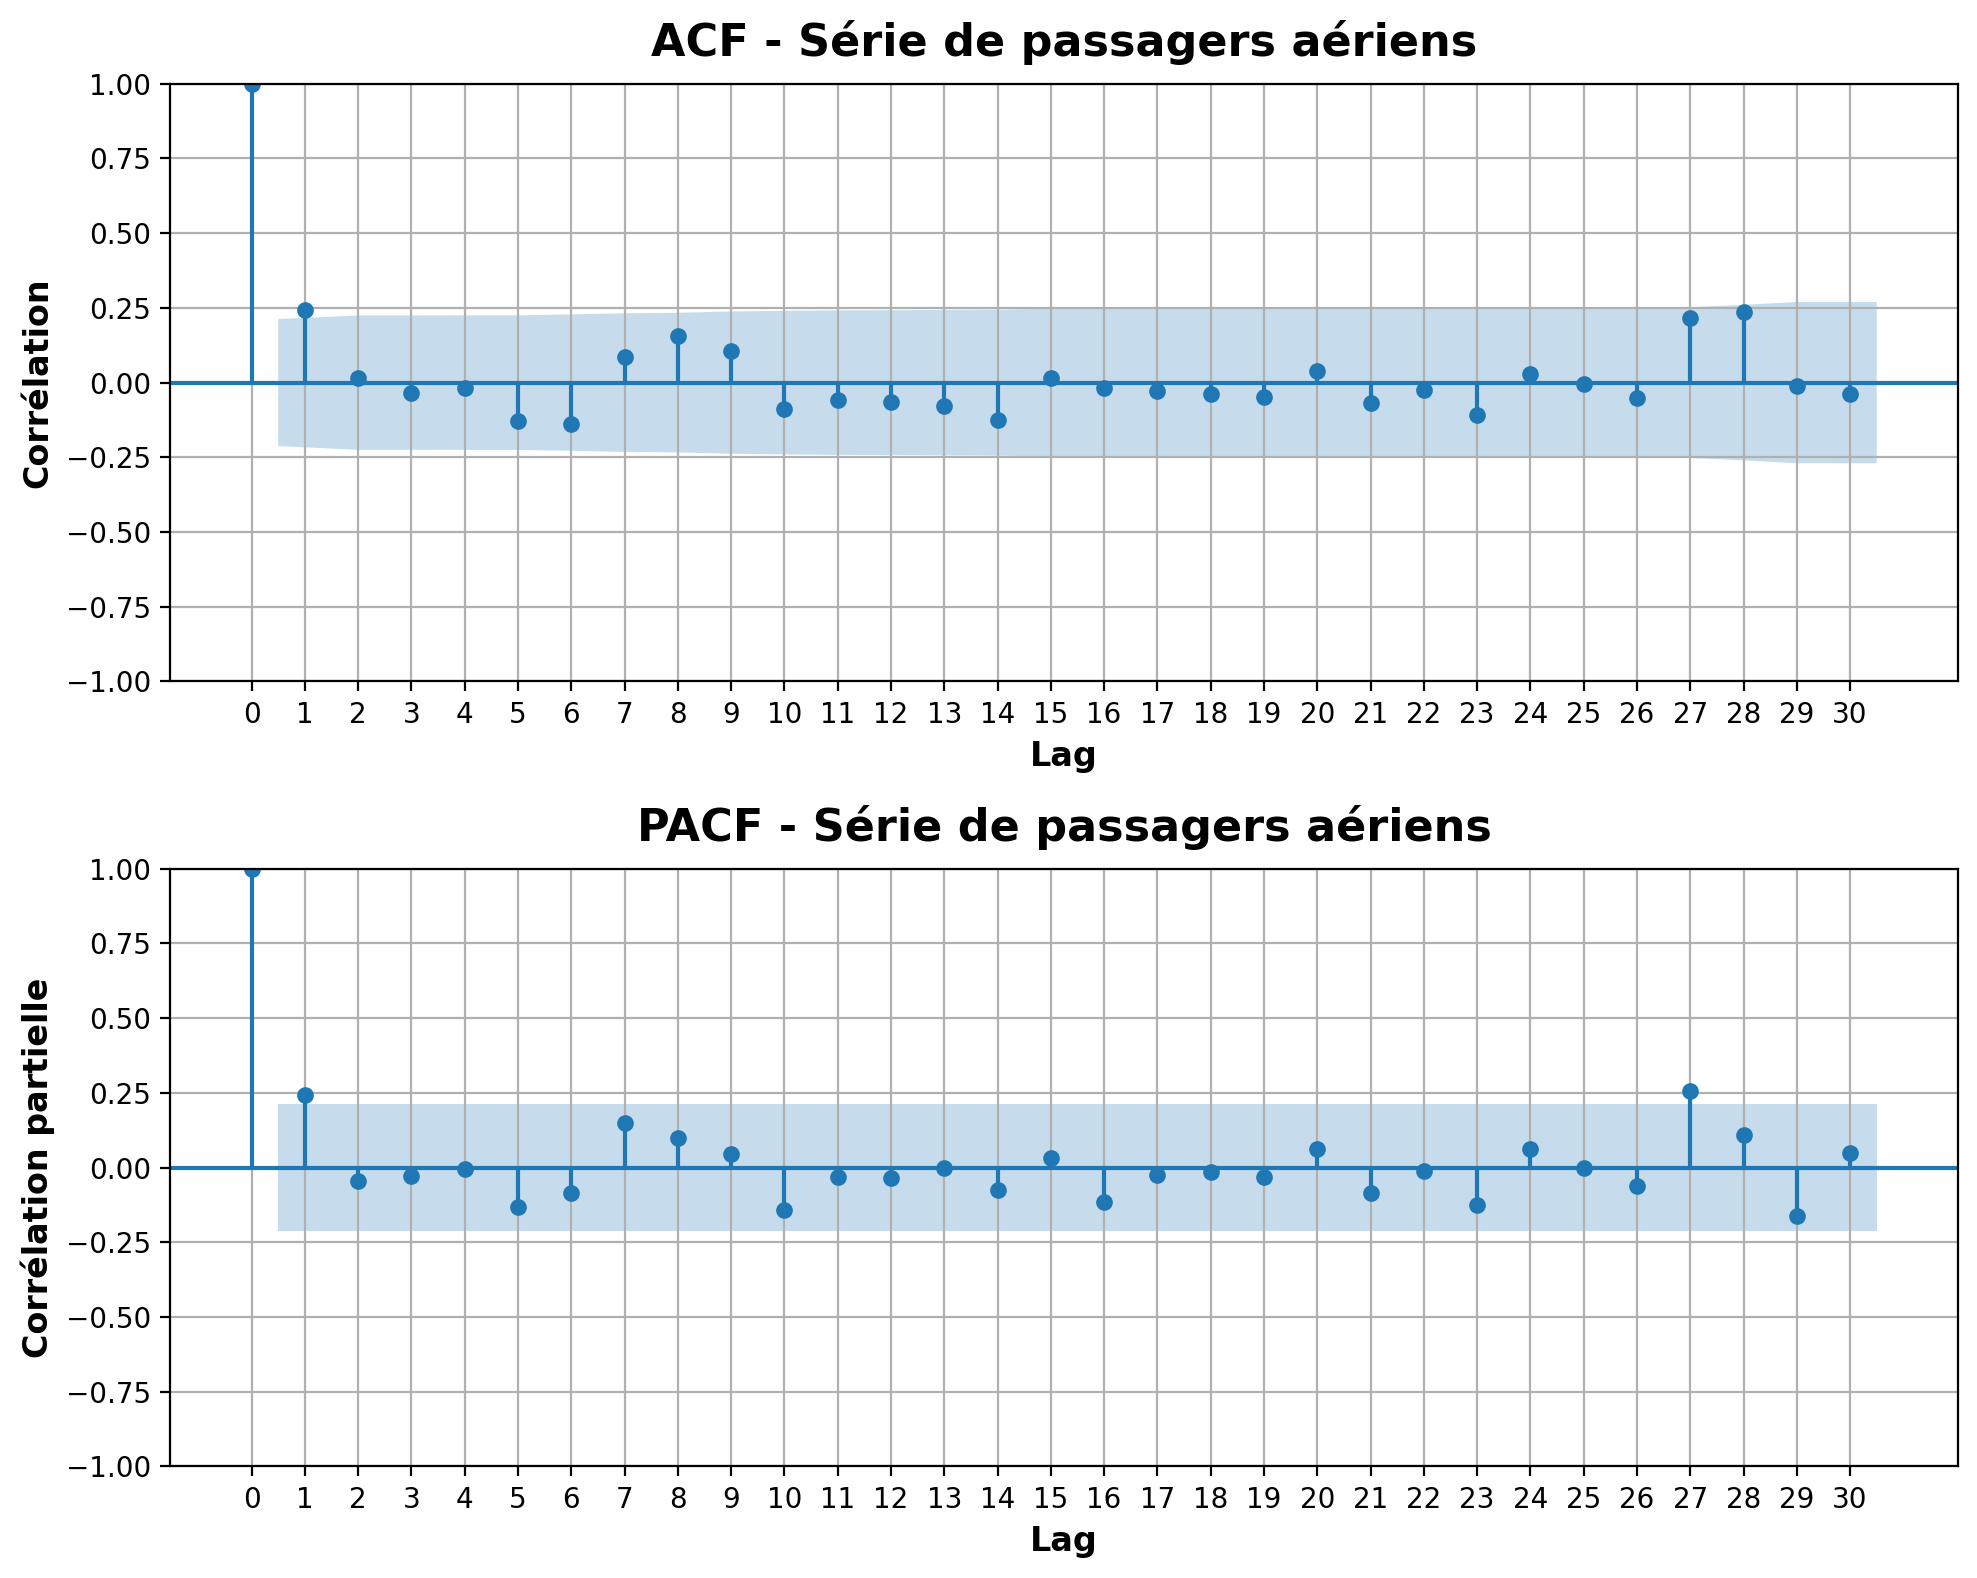

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df['Value'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df['Value'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -183.815
Date:                Tue, 06 May 2025   AIC                            373.631
Time:                        11:22:16   BIC                            374.825
Sample:                             0   HQIC                           372.879
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8780      1.358      0.647      0.518      -1.783       3.539
ma.L1         -0.1982      1.616     -0.123      0.902      -3.366       2.970
sigma2      2.273e+13   2.37e-13   9.57e+25      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmode

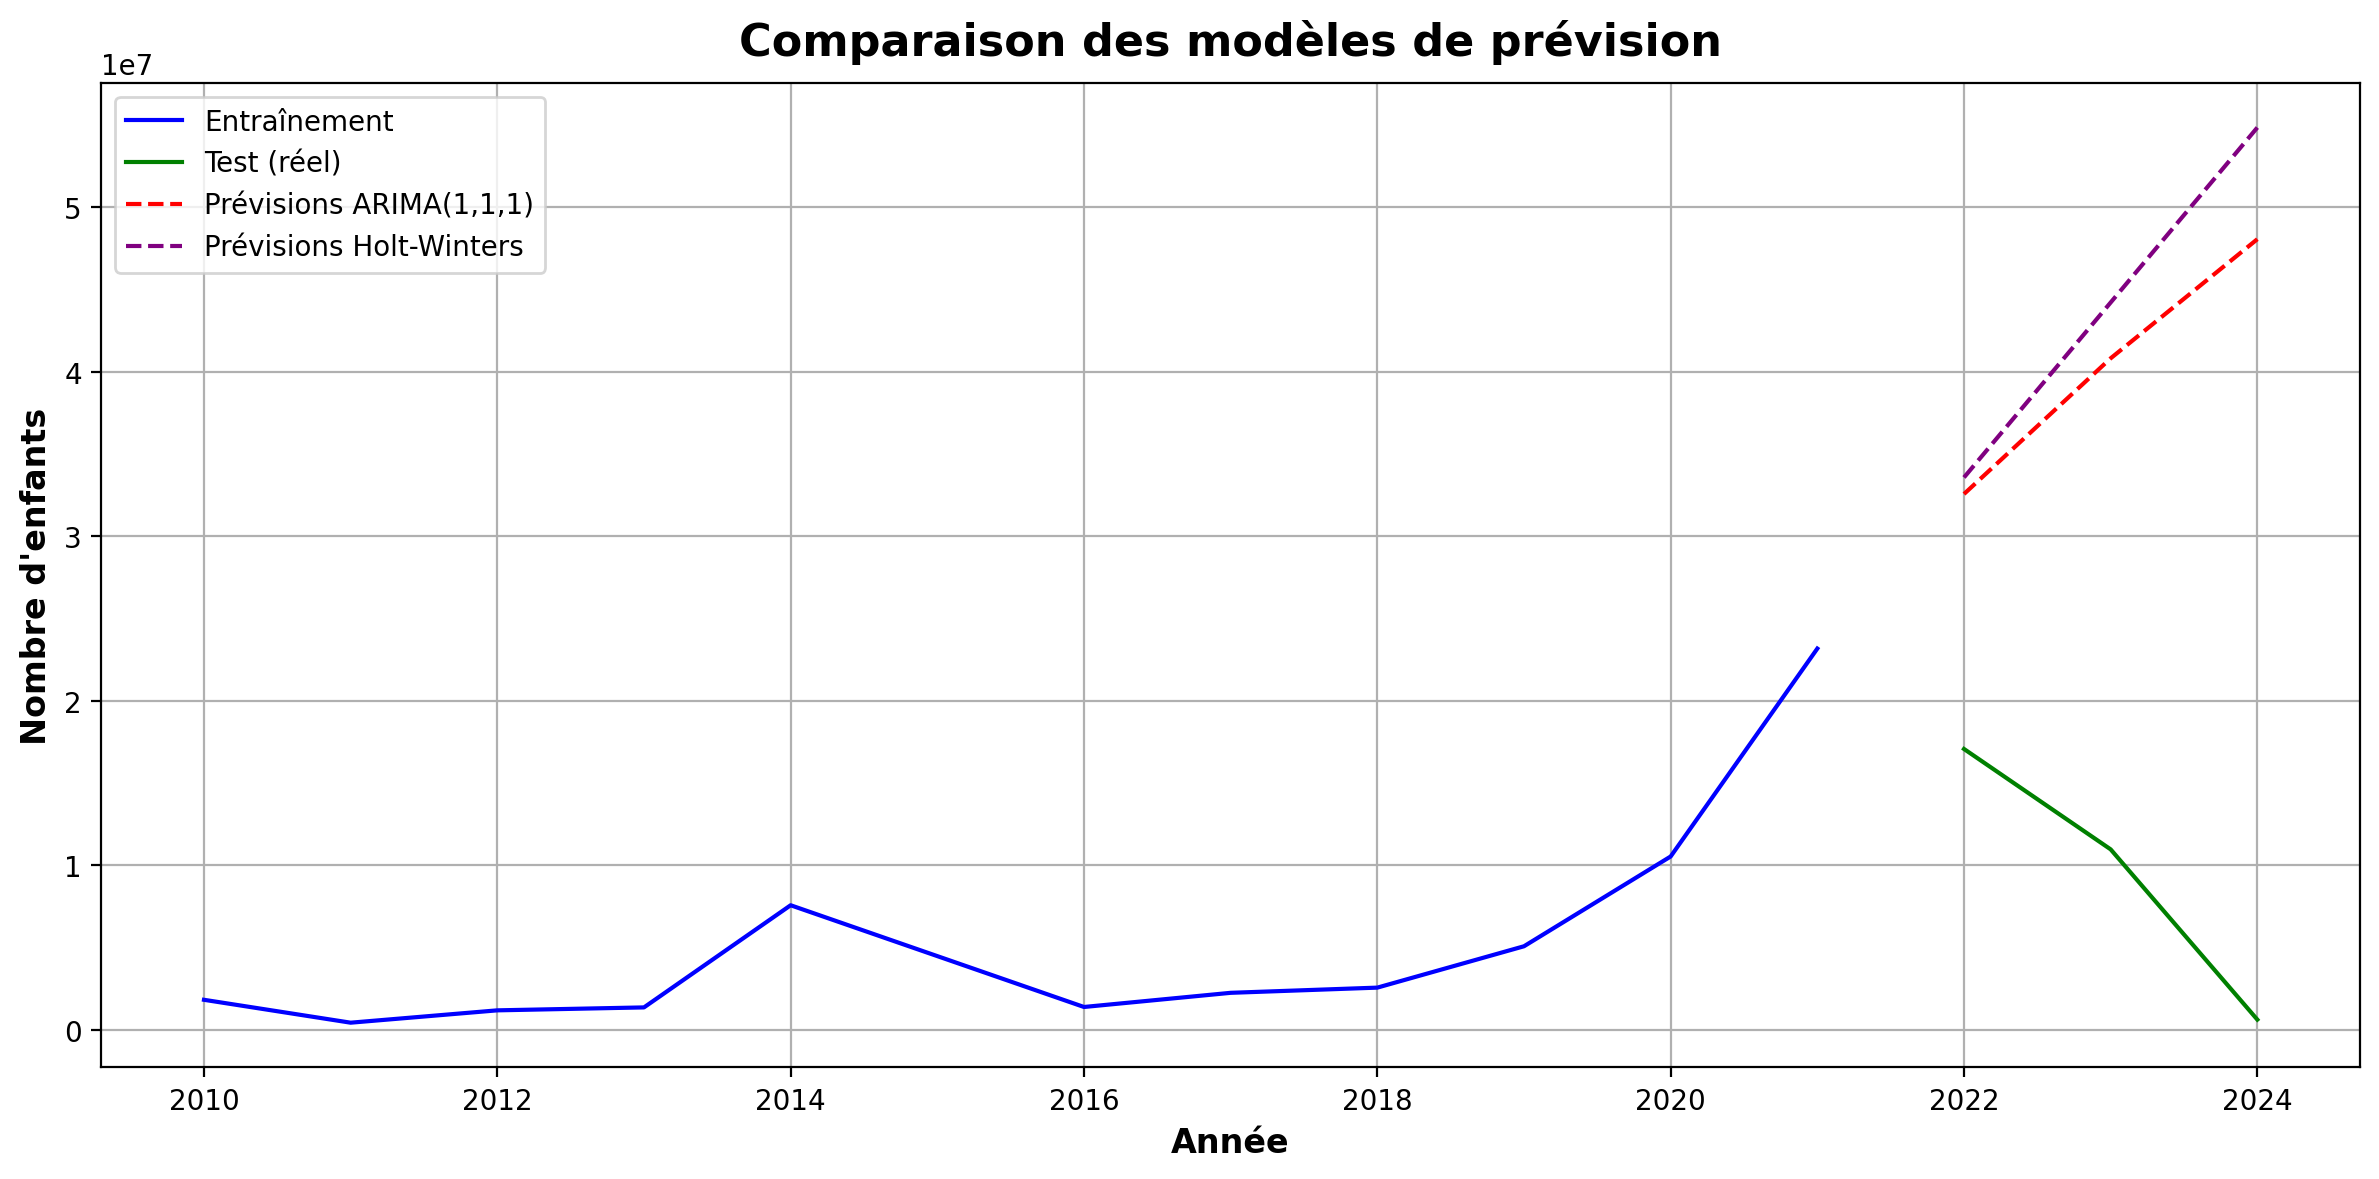

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


Comparaison des RMSE pour différents ordres ARIMA:
ARIMA(0, 1, 1): 19205600.14
ARIMA(0, 1, 2): 24713276.50
ARIMA(1, 1, 0): 29731420.12
ARIMA(2, 1, 0): 33527325.45
ARIMA(1, 1, 1): 33576091.56
ARIMA(2, 1, 2): 34794629.42


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Supposons que df_no_anomalies est déjà préparé avec l'indice temporel
# Division en ensembles d'entraînement et de test
train_size = int(len(df_no_anomalies) * 0.8)
train, test = df_no_anomalies.iloc[:train_size], df_no_anomalies.iloc[train_size:]

# Approche 1: ARIMA avec paramètres manuels (évite pmdarima)
# Basé sur l'analyse visuelle de votre décomposition, essayons (1,1,1)
model = ARIMA(train['Value'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Prévisions sur l'ensemble de test
arima_predictions = model_fit.forecast(steps=len(test))

# Approche 2: Lissage exponentiel avec tendance
model_hwes = ExponentialSmoothing(train['Value'], trend='add', seasonal=None)
model_hwes_fit = model_hwes.fit()
hwes_predictions = model_hwes_fit.forecast(len(test))

# Évaluation des modèles
models = {'ARIMA(1,1,1)': arima_predictions, 'Holt-Winters': hwes_predictions}
metrics = {}

for name, predictions in models.items():
    mse = mean_squared_error(test['Value'], predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test['Value'], predictions)
    mape = np.mean(np.abs((test['Value'] - predictions) / test['Value'])) * 100

    metrics[name] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    print(f'\n{name}:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')

# Visualisation comparative
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement', color='blue')
plt.plot(test.index, test['Value'], label='Test (réel)', color='green')

colors = ['red', 'purple']
for i, (name, predictions) in enumerate(models.items()):
    plt.plot(test.index, predictions, label=f'Prévisions {name}', color=colors[i], linestyle='--')

plt.title('Comparaison des modèles de prévision')
plt.ylabel("Nombre d'enfants")
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()

# Essayer différentes configurations ARIMA pour trouver la meilleure
orders = [(1,1,0), (0,1,1), (1,1,1), (2,1,0), (0,1,2), (2,1,2)]
results = {}

for order in orders:
    try:
        model = ARIMA(train['Value'], order=order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test['Value'], predictions)
        results[f'ARIMA{order}'] = math.sqrt(mse)
    except:
        results[f'ARIMA{order}'] = None

print("\nComparaison des RMSE pour différents ordres ARIMA:")
for model, rmse in sorted(results.items(), key=lambda x: x[1] if x[1] is not None else float('inf')):
    if rmse is not None:
        print(f"{model}: {rmse:.2f}")
    else:
        print(f"{model}: Échec de convergence")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Lissage exponentiel - RMSE: 37940237.59414125
Lissage exponentiel - MAE: 34659560.59179232
Lissage exponentiel - MAPE: nan%


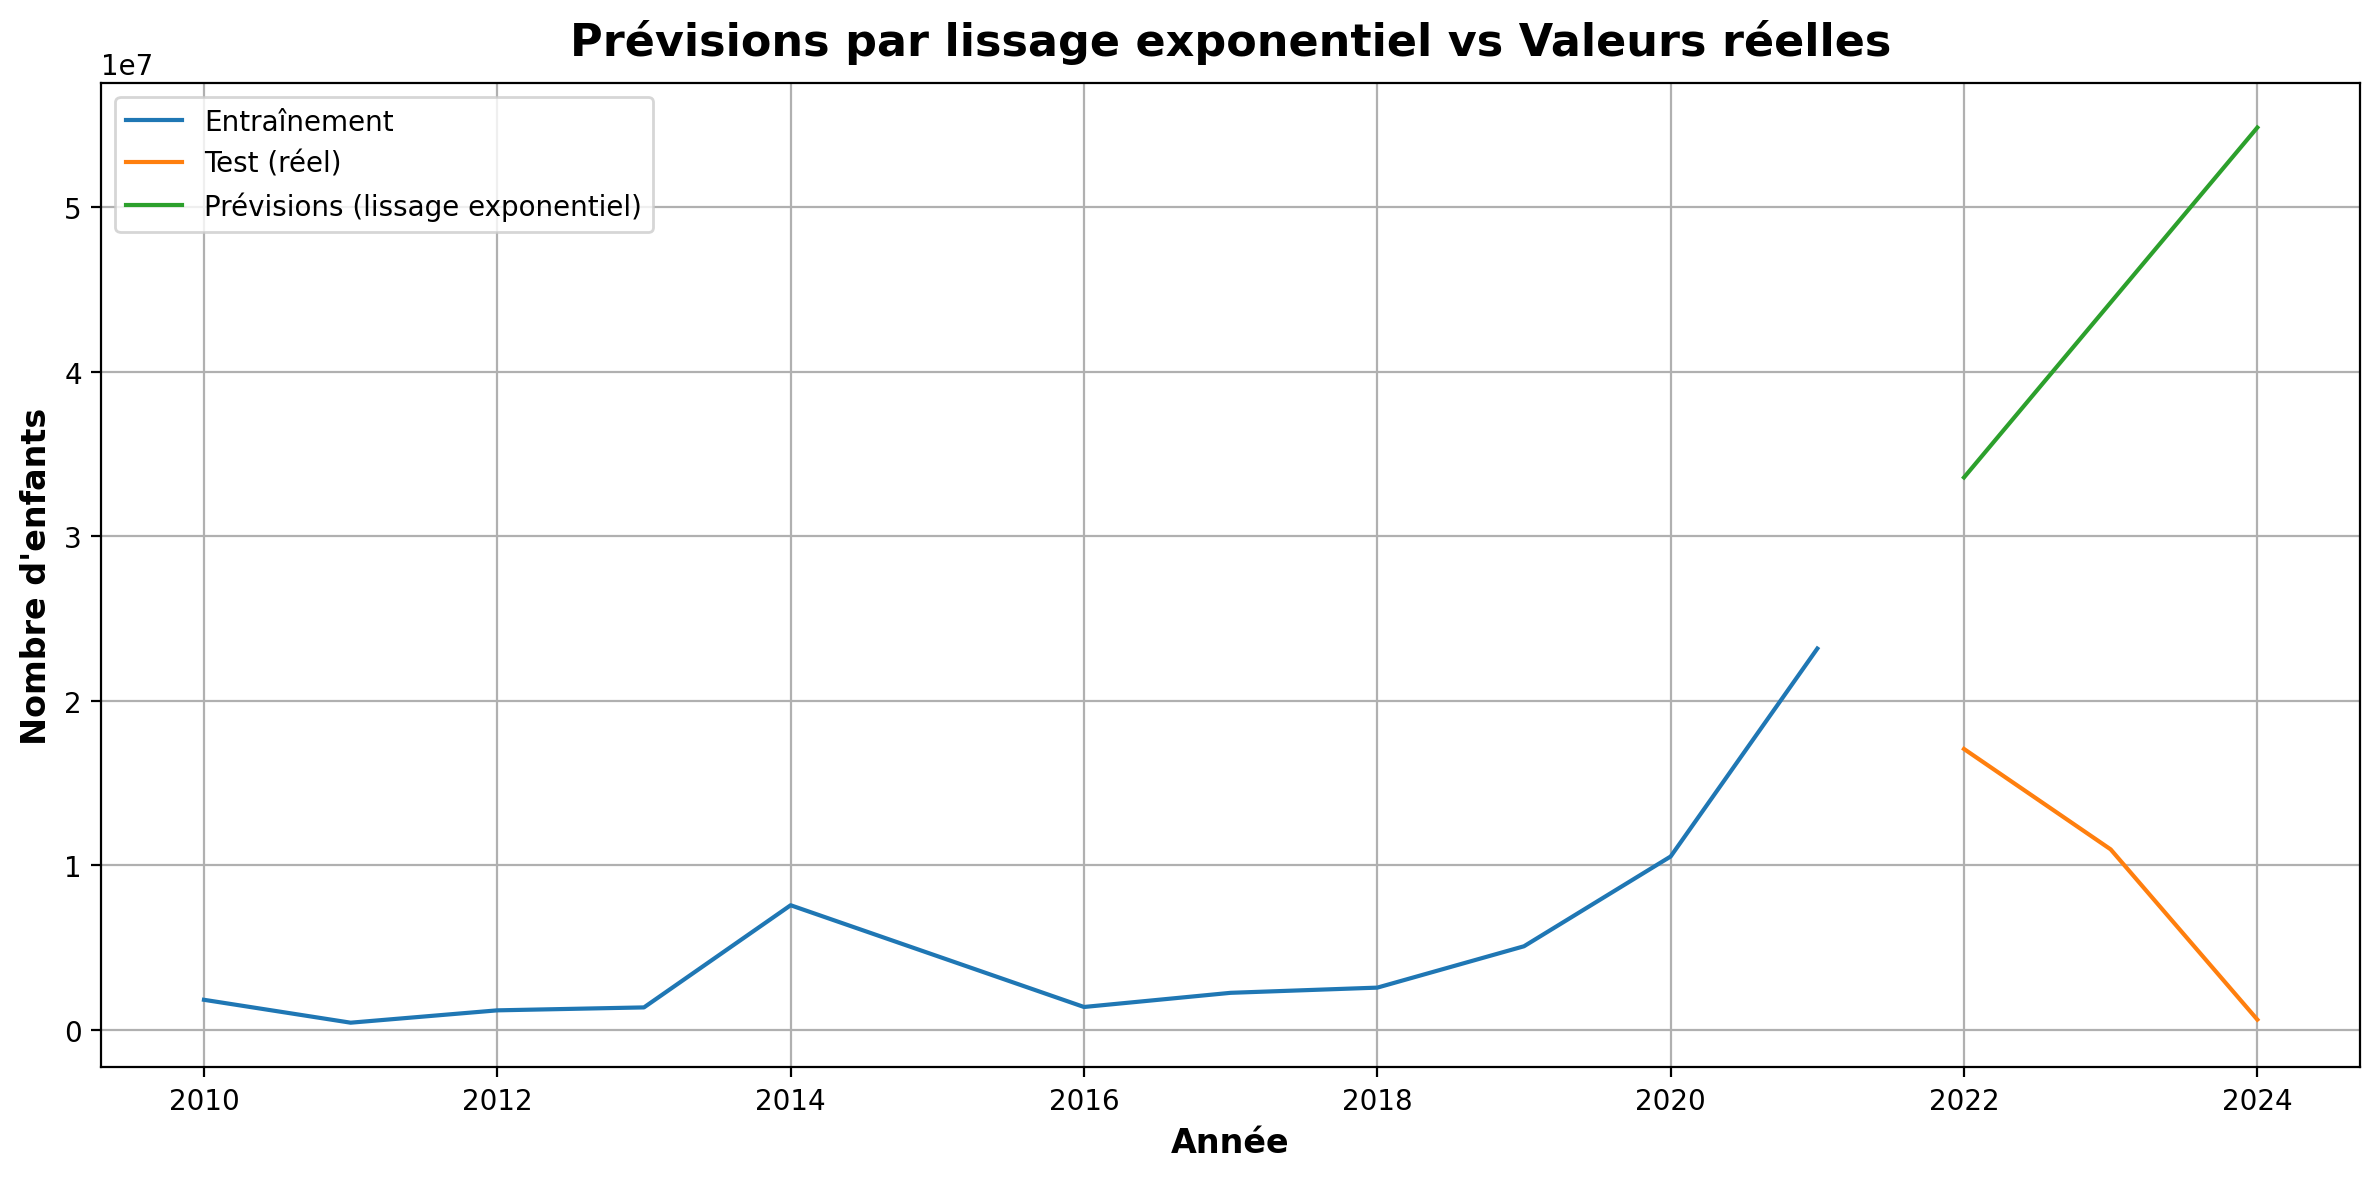

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Modèle de lissage exponentiel (Holt)
model_es = ExponentialSmoothing(train['Value'], trend='add', seasonal=None)
model_es_fit = model_es.fit()

# Prévisions
es_predictions = model_es_fit.forecast(len(test))

# Évaluation
es_mse = mean_squared_error(test['Value'], es_predictions)
es_rmse = math.sqrt(es_mse)
es_mae = mean_absolute_error(test['Value'], es_predictions)
es_mape = np.mean(np.abs((test['Value'] - es_predictions) / test['Value'])) * 100

print(f'Lissage exponentiel - RMSE: {es_rmse}')
print(f'Lissage exponentiel - MAE: {es_mae}')
print(f'Lissage exponentiel - MAPE: {es_mape}%')

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement')
plt.plot(test.index, test['Value'], label='Test (réel)')
plt.plot(test.index, es_predictions, label='Prévisions (lissage exponentiel)')
plt.title('Prévisions par lissage exponentiel vs Valeurs réelles')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

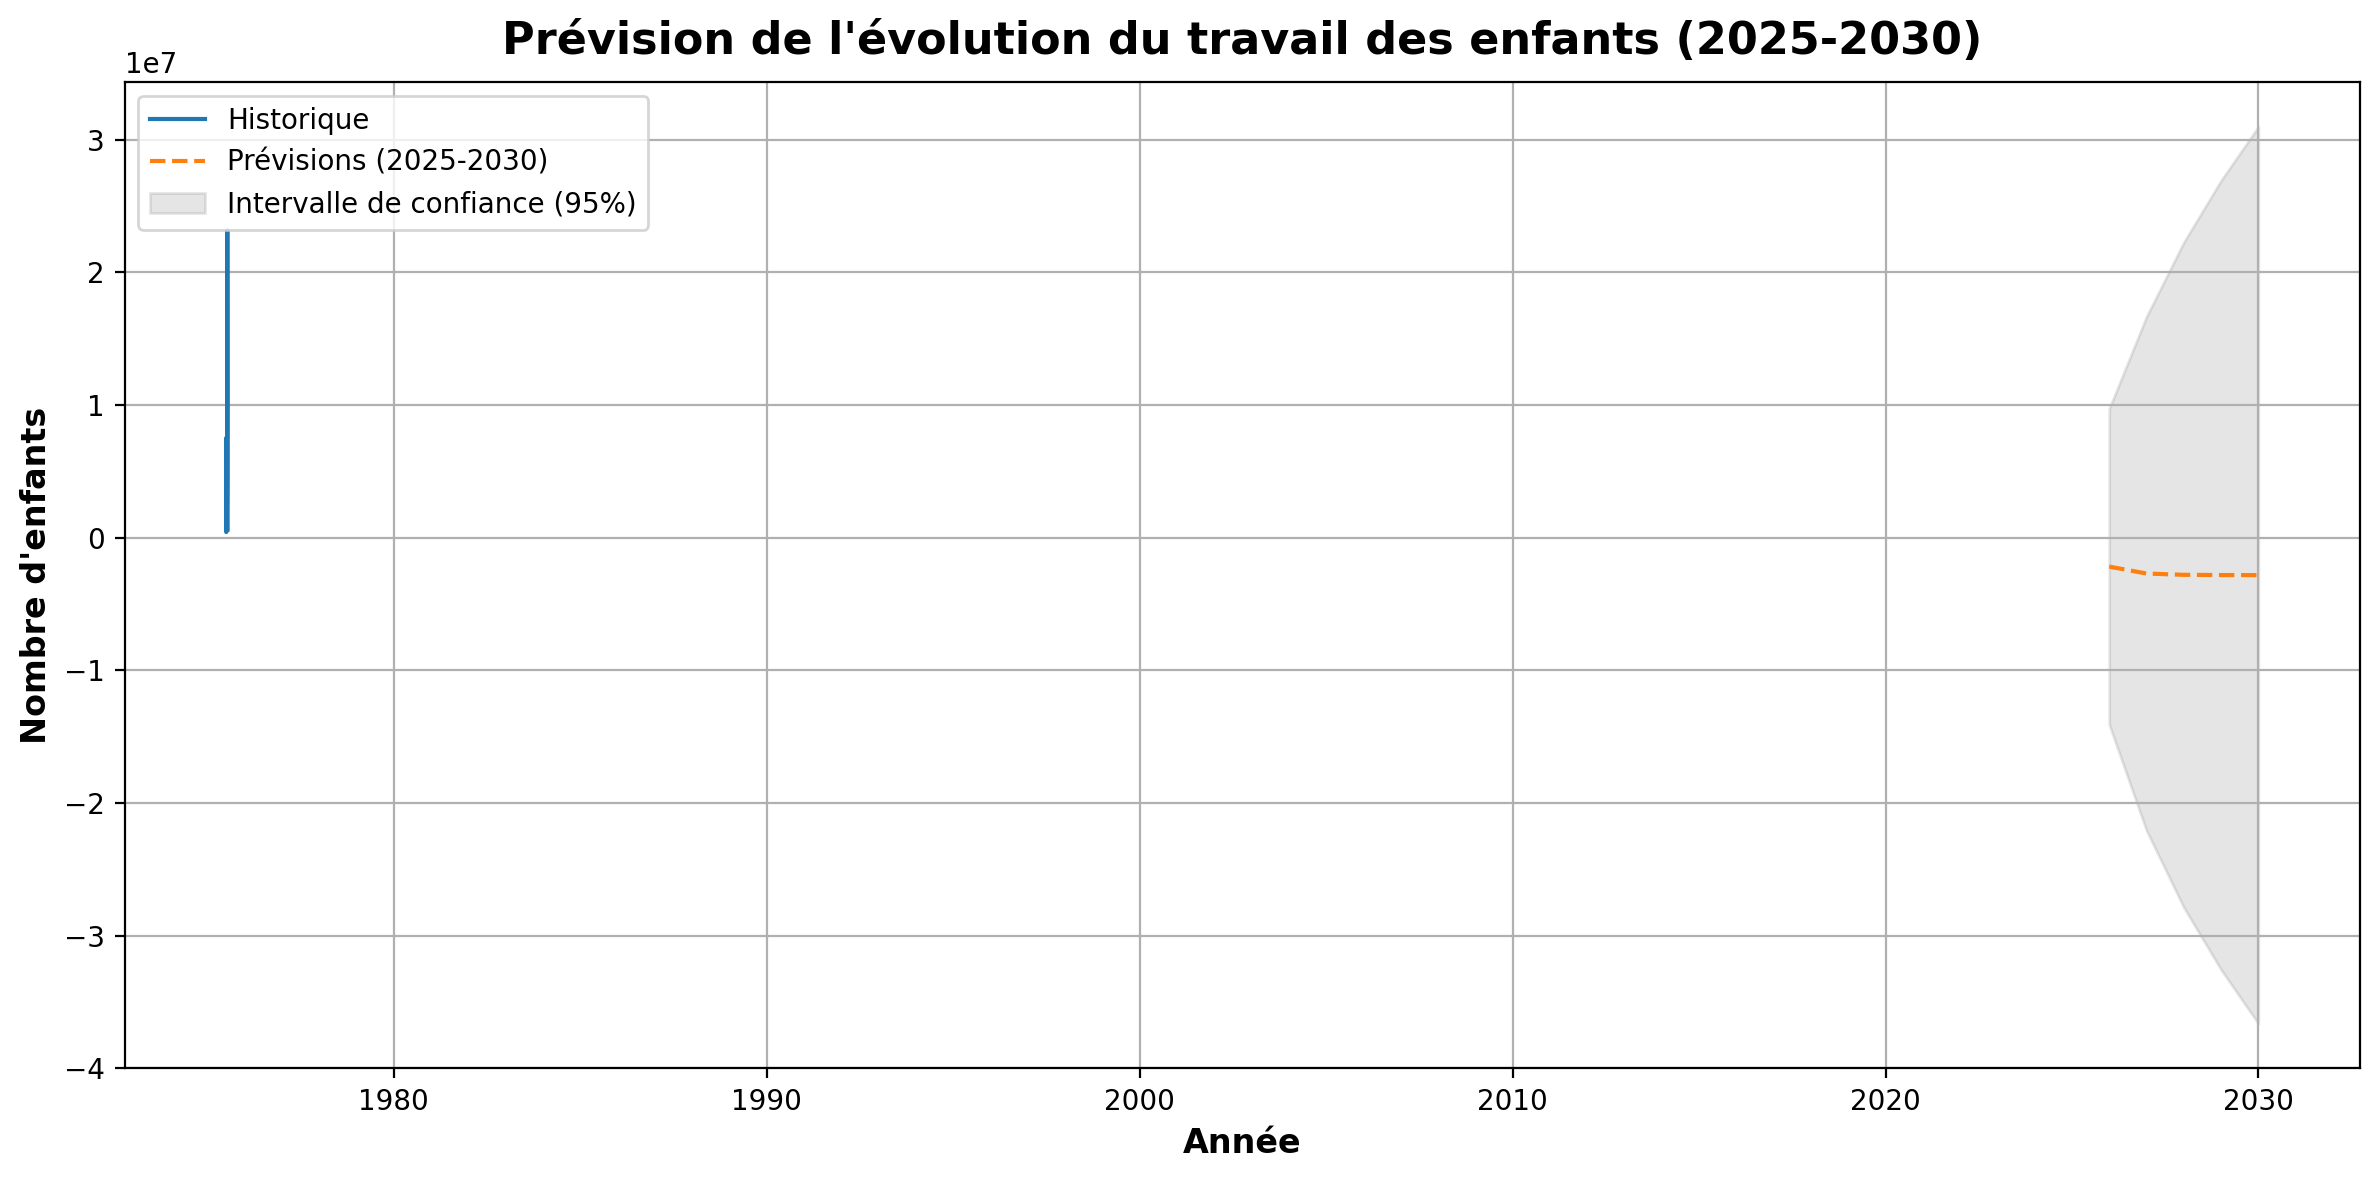

Prévisions 2025-2030:
    Année     Prévision  Limite inférieure  Limite supérieure
15   2025 -2.177173e+06      -1.407833e+07       9.723985e+06
16   2026 -2.699286e+06      -2.206544e+07       1.666687e+07
17   2027 -2.797044e+06      -2.786048e+07       2.226640e+07
18   2028 -2.815348e+06      -3.256572e+07       2.693503e+07
19   2029 -2.818775e+06      -3.662269e+07       3.098514e+07


In [ ]:
# Définir manuellement les paramètres ARIMA
# Basé sur la décomposition de votre série temporelle qui montre:
# - Tendance marquée
# - Pas de saisonnalité
# - Deux pics importants (2015 et 2022)
p, d, q = 1, 1, 1  # Paramètres suggérés pour un ARIMA(1,1,1)

# Réentraîner le modèle sur toutes les données
full_model_arima = ARIMA(df_no_anomalies['Value'], order=(p, d, q))
full_model_fit = full_model_arima.fit()

# Générer les prévisions
forecast_years = 5  # 2025-2030
forecast = full_model_fit.forecast(steps=forecast_years)
forecast_index = pd.date_range(start=str(df_no_anomalies.index[-1] + 1), periods=forecast_years, freq='A')

# Le reste de votre code reste identique
plt.figure(figsize=(12, 6))
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Historique')
plt.plot(forecast_index, forecast, label='Prévisions (2025-2030)', linestyle='--')

# Ajouter des intervalles de confiance
pred_conf = full_model_fit.get_forecast(steps=forecast_years).conf_int()
lower = pred_conf.iloc[:, 0]
upper = pred_conf.iloc[:, 1]
plt.fill_between(forecast_index, lower, upper, color='gray', alpha=0.2, label='Intervalle de confiance (95%)')

plt.title('Prévision de l\'évolution du travail des enfants (2025-2030)')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les valeurs prévues
forecast_df = pd.DataFrame({
    'Année': forecast_index.year,
    'Prévision': forecast,
    'Limite inférieure': lower,
    'Limite supérieure': upper
})
print("Prévisions 2025-2030:")
print(forecast_df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.2 MB/s eta 0:00:00


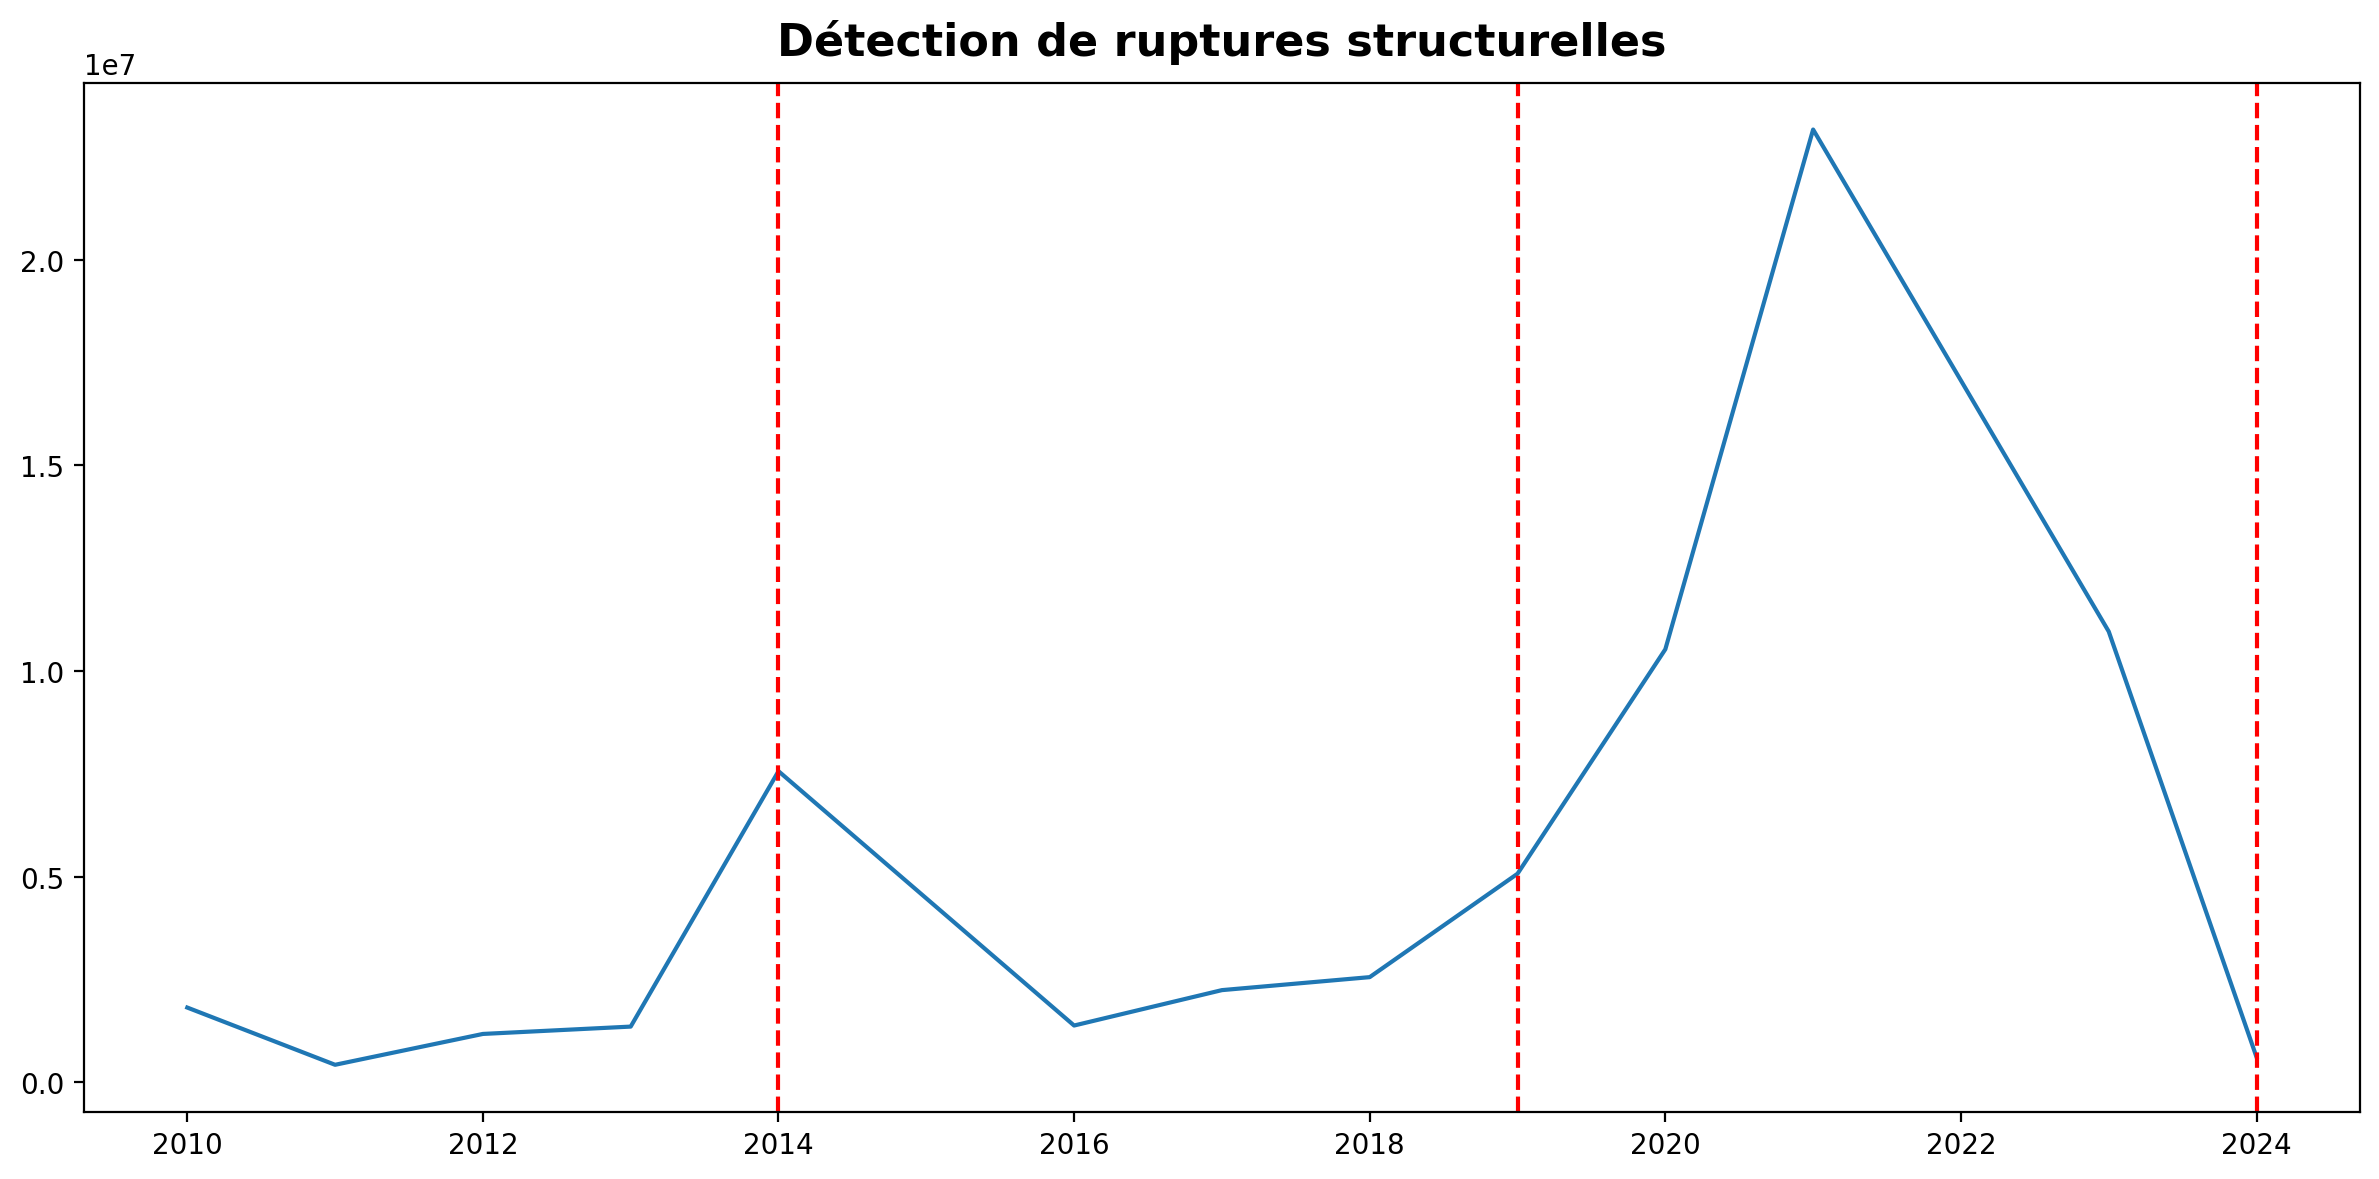

In [ ]:
!pip install ruptures
from ruptures import Binseg

# Conversion en array numpy
data_array = df_no_anomalies['Value'].values.reshape(-1, 1)

# Détection des ruptures
algo = Binseg(model="l2").fit(data_array)
result = algo.predict(n_bkps=2)  # On cherche 2 ruptures

# Visualisation des ruptures
plt.figure(figsize=(12,6))
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'])
for bkp in result:
    plt.axvline(x=df_no_anomalies.index[bkp-1], color='red', linestyle='--')
plt.title('Détection de ruptures structurelles')
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

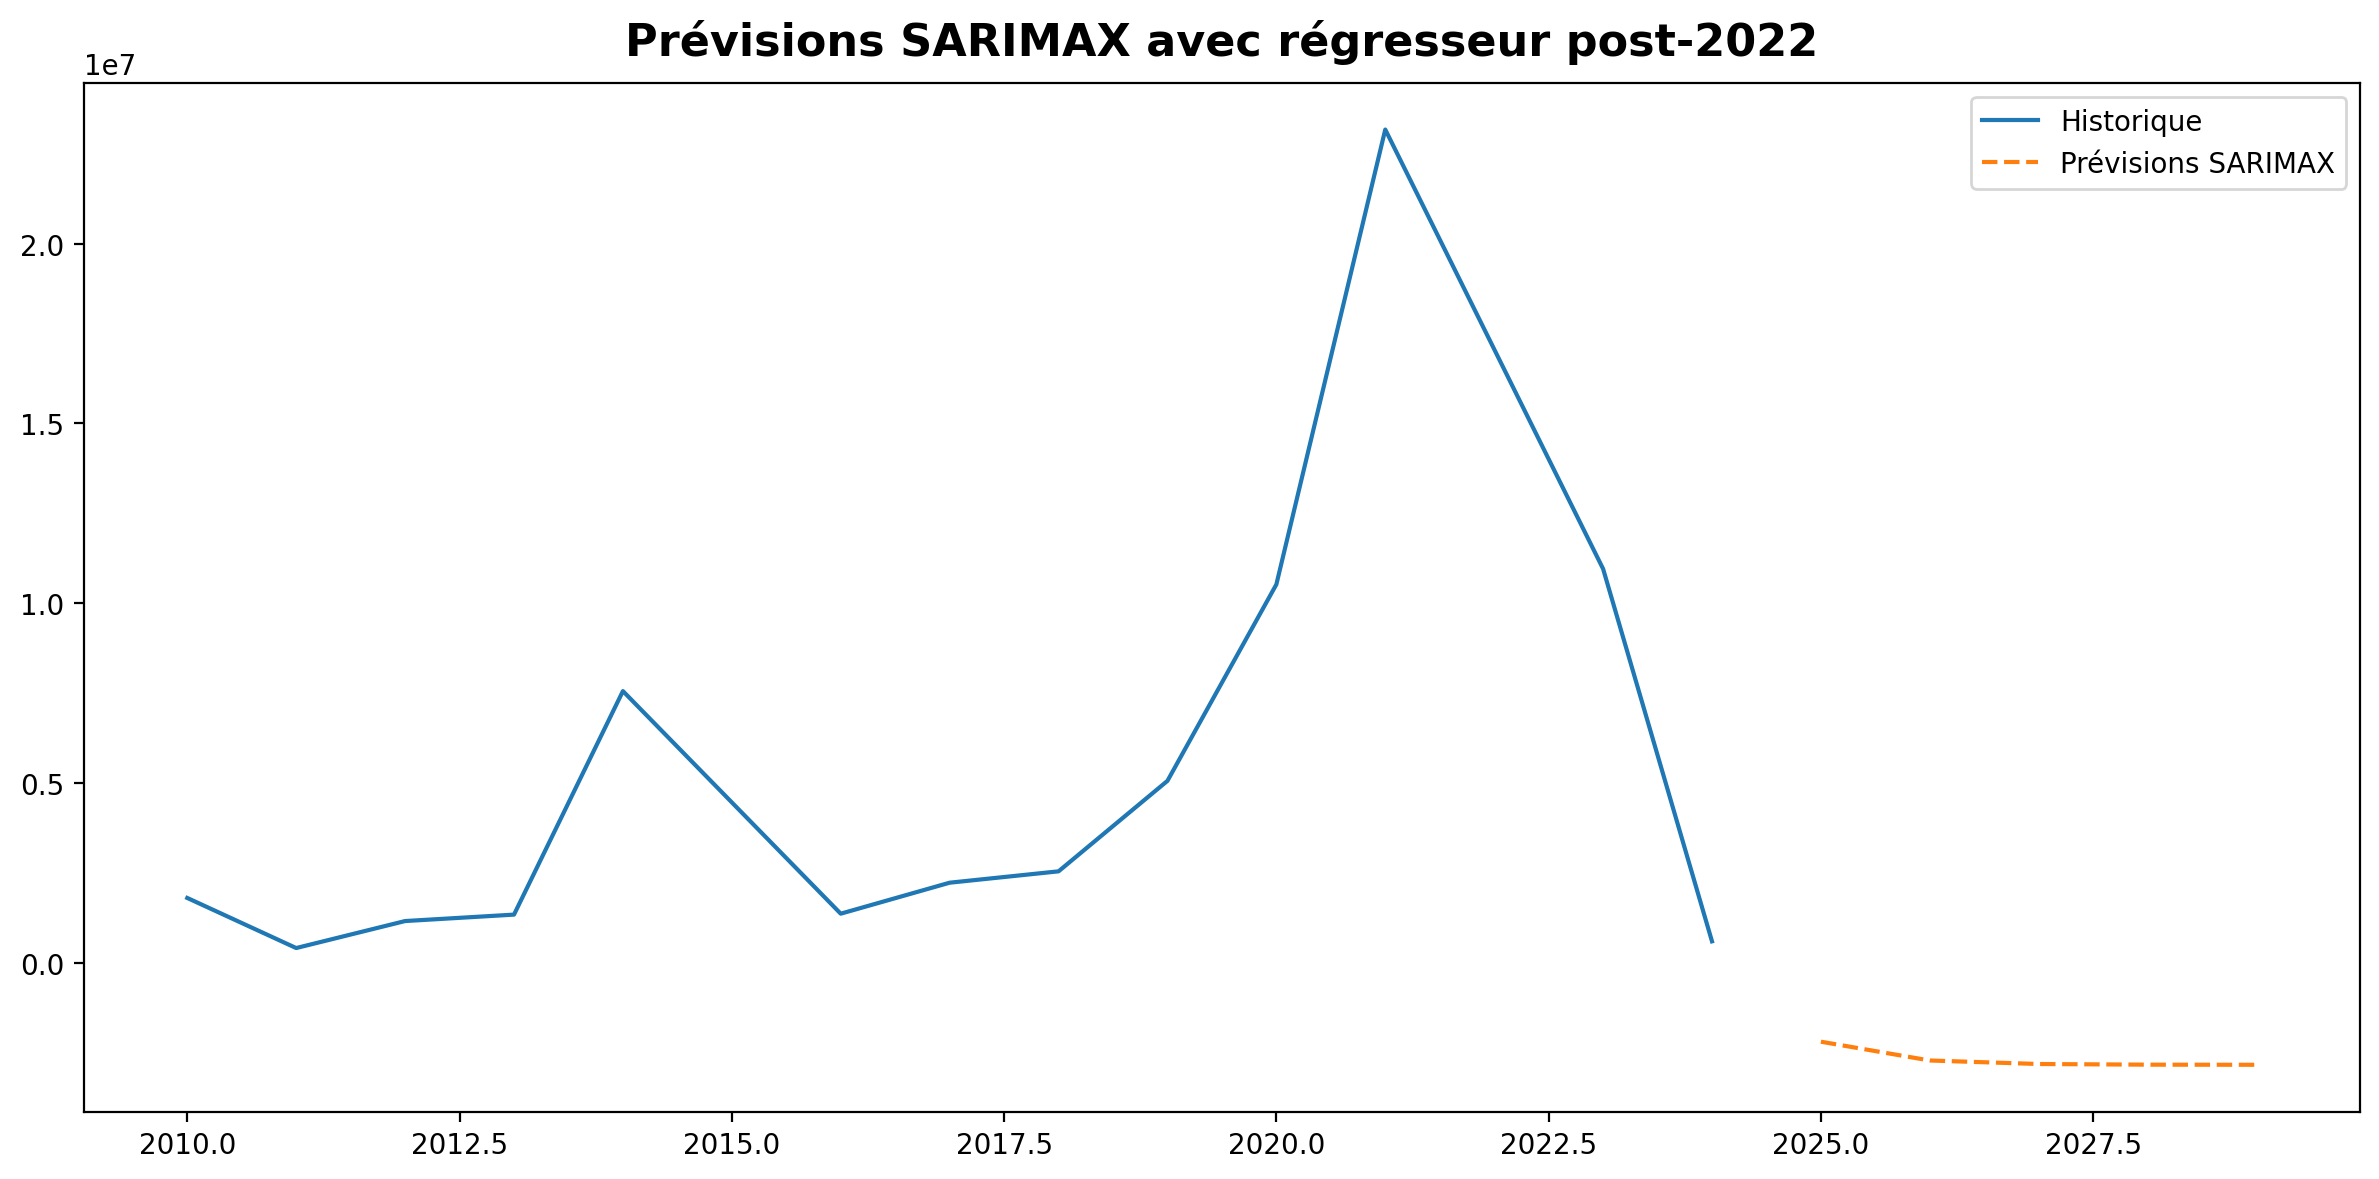

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajout d'une variable indicatrice pour le pic 2022
df_no_anomalies['post_2022'] = (df_no_anomalies.index > 2022).astype(int)

# Modèle SARIMAX(1,1,1) avec régresseur externe
model_sarimax = SARIMAX(
    df_no_anomalies['Value'],
    exog=df_no_anomalies['post_2022'],
    order=(1,1,1)
)
results_sarimax = model_sarimax.fit()

# Prévisions avec extension de la variable exogène
future_exog = pd.DataFrame({'post_2022': [1]*6}, index=range(2025, 2031))
forecast_sarimax = results_sarimax.forecast(steps=6, exog=future_exog)

# Visualisation
plt.figure(figsize=(12,6))

forecast_index = range(df_no_anomalies.index[-1] + 1, df_no_anomalies.index[-1] + 1 + forecast_years)
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Historique')
plt.plot(forecast_index, forecast, label='Prévisions SARIMAX', linestyle='--')
plt.title('Prévisions SARIMAX avec régresseur post-2022')
plt.legend()
plt.show()




In [ ]:
!pip install numpy==1.26.4

from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Division en ensembles d'entraînement et de test
train_size = int(len(df_no_anomalies) * 0.8)
train, test = df_no_anomalies.iloc[:train_size], df_no_anomalies.iloc[train_size:]

# Détermination automatique des paramètres p, d, q
from pmdarima import auto_arima

# Recherche automatique des meilleurs paramètres
model_auto = auto_arima(train['Value'], seasonal=False, stepwise=True,
                         trace=True, error_action='ignore', suppress_warnings=True)
print(f"Meilleurs paramètres ARIMA: {model_auto.order}")

# Ajustement du modèle ARIMA avec les meilleurs paramètres
p, d, q = model_auto.order
model = ARIMA(train['Value'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Prévisions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Évaluation du modèle
mse = mean_squared_error(test['Value'], predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test['Value'], predictions)
mape = np.mean(np.abs((test['Value'] - predictions) / test['Value'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

# Visualisation des prévisions vs valeurs réelles
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement')
plt.plot(test.index, test['Value'], label='Test (réel)')
plt.plot(test.index, predictions, label='Prévisions')
plt.title('Prévisions ARIMA vs Valeurs réelles')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


#Visualisation de l'evolution globale

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv(r"cleaned_data.csv")

# Nettoyer les années et les données fiables
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# Agréger par année (somme de toutes les valeurs)
df_total = df.groupby('year', as_index=False)['value'].sum()

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(df_total['year'], df_total['value'], marker='o')
plt.title("Évolution totale des effectifs (tous statuts d'éducation confondus)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.tight_layout()
plt.show()


# Visualisation de l'evolution selon education status dans le monde

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv(r"cleaned_data.csv")

# Filtrer les années et les données fiables
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# AGREGATION : sommer les valeurs par année et Education_Status
df_grouped = df.groupby(['year', 'Education_Status'], as_index=False)['value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='year',
    y='value',
    hue='Education_Status',
    marker='o'
)
plt.title("Évolution des effectifs selon Education_Status (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="Education_Status")
plt.tight_layout()
plt.show()


#Visualisation selon le sexe


In [ ]:
# Agréger par année et sexe
df_sex = df.groupby(['year', 'sex'], as_index=False)['value'].sum()

plt.figure(figsize=(12,6))
for sex in df_sex['sex'].unique():
    data = df_sex[df_sex['sex'] == sex]
    plt.plot(data['year'], data['value'], marker='o', label=sex)

plt.title("Évolution des effectifs par sexe (tous statuts d'éducation confondus)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()


# Visualisation selon l'age

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv(r"cleaned_data.csv")

# Filtrer les années et les données fiables
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# AGREGATION : sommer les valeurs par année et Education_Status
df_grouped = df.groupby(['year', 'age_group'], as_index=False)['value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='year',
    y='value',
    hue='age_group',
    marker='o'
)
plt.title("Évolution des effectifs selon Education_Status (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="age-group")
plt.tight_layout()
plt.show()


# Visualisation selon pays

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv(r"cleaned_data.csv")

# Nettoyer les années et les données fiables
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# Choisir le statut d'éducation à visualiser (ex: "Not attending" pour les enfants travailleurs)
status = "Not attending"  # Tu peux changer pour "Attending" ou "Total" selon l'analyse voulue
df_status = df[df['Education_Status'] == status]

# Agréger par année et pays
df_grouped = df_status.groupby(['year', 'country'], as_index=False)['value'].sum()

# Sélectionner les 5 pays ayant les plus grands effectifs cumulés sur la période
top_countries = (
    df_grouped.groupby('country')['value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
df_top = df_grouped[df_grouped['country'].isin(top_countries)]
print(df_status.groupby('country')['year'].unique())

country_counts = df_status.groupby('country')['year'].nunique()
multi_year_countries = country_counts[country_counts >= 3].index
df_top = df_grouped[df_grouped['country'].isin(multi_year_countries)]
print(df_top['country'].unique())
# Visualisation
plt.figure(figsize=(14,7))
for country in df_top['country'].unique():
    data = df_top[df_top['country'] == country]
    if len(data) > 1:  # Affiche seulement si plusieurs années
        plt.plot(data['year'], data['value'], marker='o', label=country)


plt.title(f"Évolution du nombre d'enfants '{status}' par pays (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()





Connexion a influxDB

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client import WriteOptions
from influxdb_client import InfluxDBClient, Point, WritePrecision



In [ ]:
INFLUXDB_URL = "http://localhost:8086"
INFLUXDB_TOKEN = "KlMhSkSNp2q-qvRYv_0g3diQ5TTJCIX7022xJvLkHb5MnKrbKxjXM1ldSJNnUUZ0aNoddR2IdeHZEP2a37BZWA=="
INFLUXDB_ORG = "uha"
INFLUXDB_BUCKET = "projet"


client = InfluxDBClient(
    url=INFLUXDB_URL,
    token=INFLUXDB_TOKEN,
    org=INFLUXDB_ORG
)
write_api = client.write_api(write_options=SYNCHRONOUS)

# 📂 Charger le fichier nettoyé
df = pd.read_csv("cleaned_data.csv")

# ✅ S'assurer que la colonne "year" est en datetime
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# 🔄 Supprimer les lignes avec des valeurs manquantes ou invalides
df = df.dropna(subset=['year', 'value', 'country', 'sex', 'age_group'])

# 🚀 Envoi des données à InfluxDB
for _, row in df.iterrows():
    point = (
        Point("child_labour")                         # Measurement
        .tag("country", row["country"])               # Tag : pays
        .tag("sex", row["sex"])                       # Tag : sexe
        .tag("age_group", row["age_group"])                       # Tag : tranche d’âge
        .field("value", float(row["value"]))          # Field : nombre d’enfants
        .time(row["year"], WritePrecision.NS)         # Timestamp
    )
    write_api.write(bucket=INFLUXDB_BUCKET, org=INFLUXDB_ORG, record=point)

print("✅ Données envoyées avec succès à InfluxDB !")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données nettoyées
df = pd.read_csv("cleaned_data.csv")
df["year"] = pd.to_datetime(df["year"])

# Filtrer un pays et une tranche d'âge par exemple
df_subset = df[(df["country"] == "Argentina") & (df["age_group"] == "15-17")& (df["Education_Status"] == "Not attending")]

# Séparer les données fiables et non fiables
df_fiable = df_subset[~df_subset["Fiability_data"].isin(["Unreliable", "Break in series"])]
df_non_fiable = df_subset[df_subset["Fiability_data"].isin(["Unreliable", "Break in series"])]

plt.figure(figsize=(10, 6))

# Tracer les données fiables
plt.plot(df_fiable["year"], df_fiable["value"], label="Fiables", color="blue", marker="o")

# Tracer les données douteuses
plt.scatter(df_non_fiable["year"], df_non_fiable["value"],
            label="Données douteuses", color="red", marker="x", s=100)

plt.title("Évolution du travail des enfants (15-19 ans) - Algérie")
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
# Charger le dataset
df = pd.read_csv("cleaned_data.csv")
df["year"] = pd.to_datetime(df["year"]).dt.year


# Créer le DataFrame des données fiables
df_fiables = df[~df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Créer le DataFrame des données non fiables
df_non_fiables = df[df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Vérification rapide
print("✅ Nombre de lignes FIABLES :", len(df_fiables))
print("⚠️  Nombre de lignes NON FIABLES :", len(df_non_fiables))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrer par pays et âge
country = "Argentina"
age_group = "15-17"
Education="Not attending"
df_subset = df[(df["country"] == country) & (df["age_group"] == age_group)&( df["Education_Status"]==Education)]

# Séparer fiables et non fiables
df_fiables = df_subset[~df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Créer le DataFrame des données non fiables
df_non_fiables = df_subset[df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Tracer
plt.figure(figsize=(10, 6))

# Courbe des valeurs FIABLES
plt.plot(df_fiables["year"], df_fiables["value"], label="Fiables", color="blue", marker="o")

# Points douteux NON FIABLES
plt.scatter(df_non_fiables["year"], df_non_fiables["value"],
            label="Non fiables", color="red", marker="x", s=100)

plt.title(f"Travail des enfants (âge {age_group}) – {country}")
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données nettoyées
df = pd.read_csv("cleaned_data.csv")
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[df['Fiability_data'].isna()]  # Garder les données fiables

# Agréger par année
df_total = df.groupby('year', as_index=False)['value'].sum()

# Visualisation de la tendance
plt.figure(figsize=(10,5))
plt.plot(df_total['year'], df_total['value'], marker='o')
plt.title("Tendance du nombre total d'enfants travailleurs (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Si tu as des données mensuelles, par exemple
# df_monthly = df.groupby(['year', 'month'])['value'].sum().reset_index()
# df_monthly['date'] = pd.to_datetime(df_monthly[['year', 'month']].assign(day=1))
# df_monthly.set_index('date', inplace=True)

# Pour des données annuelles
df_total.set_index('year', inplace=True)
result = seasonal_decompose(df_total['value'], model='additive', period=1)  # period=1 pour annuel

result.plot()
plt.suptitle("Décomposition de la tendance (annuelle)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_total.index.values.reshape(-1, 1)
y = df_total['value'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df_total.index, df_total['value'], marker='o', label='Données réelles')
plt.plot(df_total.index, y_pred, color='red', linestyle='--', label='Tendance linéaire')
plt.title("Tendance linéaire du nombre d'enfants travailleurs")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_no2020 = df_total[df_total.index != 2020]
print(df_no2020)
plt.figure(figsize=(10,5))
plt.plot(df_no2020.index, df_no2020['value'], marker='o')
plt.title("Tendance du nombre total d'enfants travailleurs (hors 2020)")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Charger les données
df = pd.read_csv("cleaned_data.csv")
df['year'] = pd.to_datetime(df['year']).dt.year
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# Agréger par année (somme des effectifs)
df_total = df.groupby('year', as_index=False)['value'].sum()

# Exclure 2020
df_total_no2020 = df_total[df_total['year'] != 2020]

# Mettre l'année en index (obligatoire pour la décomposition)
df_total_no2020 = df_total_no2020.set_index('year')

# Décomposition de la série (tendance, saisonnalité, résidus)
result = seasonal_decompose(df_total_no2020['value'], model='additive', period=1)  # period=1 pour annuel

# Visualisation des composantes
result.plot()
plt.suptitle("Décomposition de la série temporelle (hors 2020)")
plt.tight_layout()
plt.show()
